# Hassan Augusto Bittencourt de Oliveira
### 22/11/2023

# Exercice

La base de données "elections-presidentielles-2017-1ertour.csv" extraite du site https://opendata.paris.fr/explore/dataset/elections-presidentielles-2017-1ertour/information/?disjunctive.id_bvote&disjunctive.num_circ&disjunctive.num_quartier&disjunctive.num_arrond contient les résultats du 1er tour des élections présidentielles du 23 avril 2017 par bureau de vote, quartier, arrondissement et circonscription.

### Pour les utilisateurs de Colab
rajouter 

from google.colab import files

uploaded = files.upload()

In [3]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot

In [4]:
data_presidentielles = pandas.read_csv("elections-presidentielles-2017-1ertour.csv",  sep =';')

In [5]:
data_presidentielles

,ID_BVOTE,SCRUTIN,ANNEE,TOUR,DATE,NUM_CIRC,NUM_QUARTIER,NUM_ARROND,NUM_BUREAU,NB_PROCU,...,HAMON Benoît,ARTHAUD Nathalie,POUTOU Philippe,CHEMINADE Jacques,LASSALLE Jean,MÉLENCHON Jean-Luc,ASSELINEAU François,FILLON François,geo_shape,geo_point_2d
0,15-49,Présidentielle,2017,1,2007-04-23,13,57,15,49,32,...,107,7,13,1,10,272,9,208,"{""type"": ""Polygon"", ""coordinates"": [[[2.291134...","48.8284597999,2.2947592188"
1,15-51,Présidentielle,2017,1,2007-04-23,13,57,15,51,68,...,126,7,4,1,6,168,15,407,"{""type"": ""Polygon"", ""coordinates"": [[[2.296524...","48.8330859695,2.29994195103"
2,15-77,Présidentielle,2017,1,2007-04-23,13,58,15,77,55,...,90,4,5,1,8,224,15,366,"{""type"": ""Polygon"", ""coordinates"": [[[2.281700...","48.8374011926,2.27208045955"
3,16-42,Présidentielle,2017,1,2007-04-23,14,63,16,42,60,...,29,2,4,2,2,49,7,554,"{""type"": ""Polygon"", ""coordinates"": [[[2.259387...","48.8416058361,2.26026627937"
4,16-55,Présidentielle,2017,1,2007-04-23,4,64,16,55,98,...,27,0,1,0,4,44,3,817,"{""type"": ""Polygon"", ""coordinates"": [[[2.275841...","48.8675564159,2.27354998682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,18-64,Présidentielle,2017,1,2007-04-23,17,72,18,64,44,...,145,7,19,1,10,502,23,120,"{""type"": ""Polygon"", ""coordinates"": [[[2.359424...","48.8954256652,2.36069257185"
892,18-67,Présidentielle,2017,1,2007-04-23,3,69,18,67,60,...,163,2,20,2,1,304,16,159,"{""type"": ""Polygon"", ""coordinates"": [[[2.339433...","48.8955565768,2.33825775116"
893,19-24,Présidentielle,2017,1,2007-04-23,16,75,19,24,42,...,129,3,14,2,7,289,7,311,"{""type"": ""Polygon"", ""coordinates"": [[[2.393886...","48.8853293542,2.39198328468"
894,20-21,Présidentielle,2017,1,2007-04-23,15,78,20,21,43,...,125,2,8,3,5,312,17,157,"{""type"": ""Polygon"", ""coordinates"": [[[2.412624...","48.8759066441,2.40819867494"


1. Extraire le nombre de voix pour le candidat Jean-Luc MÉLENCHON

2. Représenter sous forme d'histogramme le nombre de voix obtenues par Jean-Luc MÉLENCHON.

3. Compter le nombre de bureaux de vote par arrondissement.

4. Extraire le nombre de voix obtenues par Benoît Hamon dans chaque bureau de vote.

5. Extraire le nombre de voix obtenues par chaque candidat et par arrondissement.

6. Représenter sous forme de camembert, de barres le nombre de voix des 4 candidats 'LE PEN Marine', 'MACRON Emmanuel','MÉLENCHON Jean-Luc', 'FILLON François', par arrondissement. Quelle représentation vous semble être la plus adaptée?

7. Représenter sous forme graphique d'autres données extraites de ce tableau. Vous choisirez celles qui vous paraissent représentatives.


1 - Extraire le nombre de voix pour le candidat Jean-Luc MÉLENCHON

In [6]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot

In [7]:
# Créer le Dataframe
df = pandas.DataFrame(data_presidentielles)

# Vérification des noms de colonnes
df.columns

Index(['ID_BVOTE', 'SCRUTIN', 'ANNEE', 'TOUR', 'DATE', 'NUM_CIRC',
       'NUM_QUARTIER', 'NUM_ARROND', 'NUM_BUREAU', 'NB_PROCU', 'NB_INSCR',
       'NB_EMARG', 'NB_VOTANT', 'NB_BL', 'NB_NUL', 'NB.EXPRIM',
       'DUPONT-AIGNAN Nicolas', 'LE PEN Marine', 'MACRON Emmanuel',
       'HAMON Benoît', 'ARTHAUD Nathalie', 'POUTOU Philippe',
       'CHEMINADE Jacques', 'LASSALLE Jean', 'MÉLENCHON Jean-Luc',
       'ASSELINEAU François', 'FILLON François', 'geo_shape', 'geo_point_2d'],
      dtype='object')

In [8]:
# Somme des nombres de voix pour le candidat Jean-Luc MÉLENCHON
MELENCHON = sum(df['MÉLENCHON Jean-Luc'])
MELENCHON

210548

2 - Représenter sous forme d'histogramme le nombre de voix obtenues par Jean-Luc MÉLENCHON.

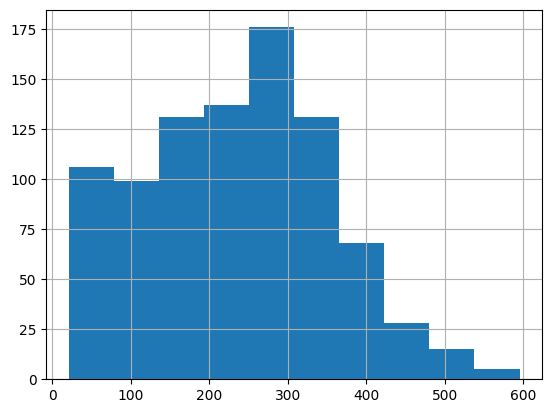

In [9]:
hist = df['MÉLENCHON Jean-Luc'].hist()

3 - Compter le nombre de bureaux de vote par arrondissement.


In [10]:
# En ajoutant tous les votes qui ont le même "NUM_ARROUND"
sum_par_arrond = df.groupby(by=['NUM_ARROND']).sum(numeric_only=True)

# Nombre de bureaux de vote par arrondissement
print(sum_par_arrond['NUM_BUREAU'])

NUM_ARROND
1       55
2       55
3      120
4      105
5      325
6      253
7      325
8      171
9      378
10     780
11    1540
12    2080
13    2556
14    1653
15    4560
16    2346
17    2278
18    2346
19    2485
20    2926
Name: NUM_BUREAU, dtype: int64


4 - Extraire le nombre de voix obtenues par Benoît Hamon dans chaque bureau de vote.

In [11]:
sum_par_bureau = df.groupby(by=['ID_BVOTE']).sum(numeric_only=True)

print(sum_par_bureau['HAMON Benoît'])

ID_BVOTE
1-1      62
1-10     37
1-2      83
1-3      77
1-4     102
       ... 
9-5     113
9-6      71
9-7      82
9-8      79
9-9      90
Name: HAMON Benoît, Length: 896, dtype: int64


5 - Extraire le nombre de voix obtenues par chaque candidat et par arrondissement.

In [12]:
# Suppression des colonnes qui ne nous intéressent pas et affichage du résultat
sum_par_arrond_filter = sum_par_arrond.drop(sum_par_arrond.columns[0:12], axis='columns').reset_index()
sum_par_arrond_filter

,NUM_ARROND,DUPONT-AIGNAN Nicolas,LE PEN Marine,MACRON Emmanuel,HAMON Benoît,ARTHAUD Nathalie,POUTOU Philippe,CHEMINADE Jacques,LASSALLE Jean,MÉLENCHON Jean-Luc,ASSELINEAU François,FILLON François
0,1,128,443,3561,659,15,32,11,57,1231,58,2831
1,2,128,399,5013,1099,17,49,17,46,1802,81,2640
2,3,183,615,8325,1963,47,92,15,73,3078,100,3994
3,4,214,735,6182,1370,36,82,23,83,2329,96,3956
4,5,459,1225,12316,3103,63,170,39,178,4960,222,8273
5,6,268,719,8729,1419,28,76,26,134,2038,126,8769
6,7,324,1064,8785,1068,29,75,23,126,1552,102,14650
7,8,241,916,6568,849,23,54,17,83,1392,107,10448
8,9,390,1092,14029,3163,61,154,31,150,4783,208,8879
9,10,577,1817,16880,6343,125,310,52,211,11396,331,6724


6 - Représenter sous forme de camembert, de barres le nombre de voix des 4 candidats 'LE PEN Marine', 'MACRON Emmanuel','MÉLENCHON Jean-Luc', 'FILLON François', par arrondissement. Quelle représentation vous semble être la plus adaptée?

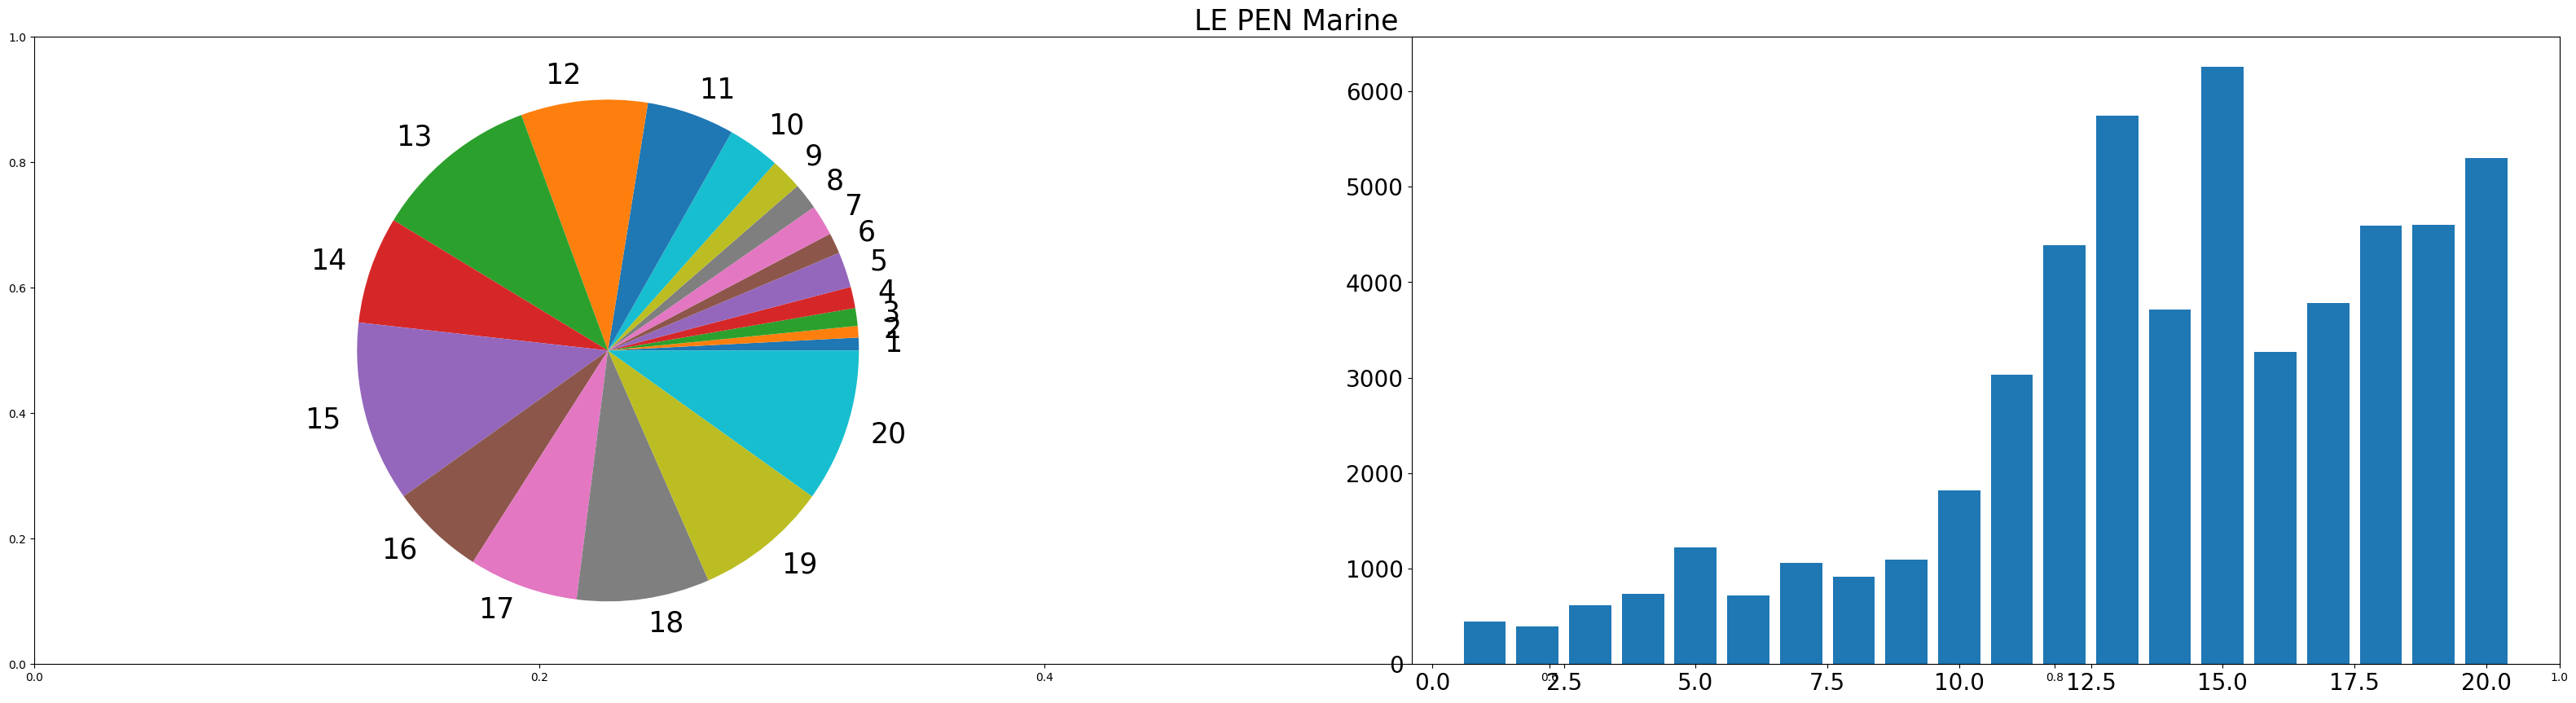

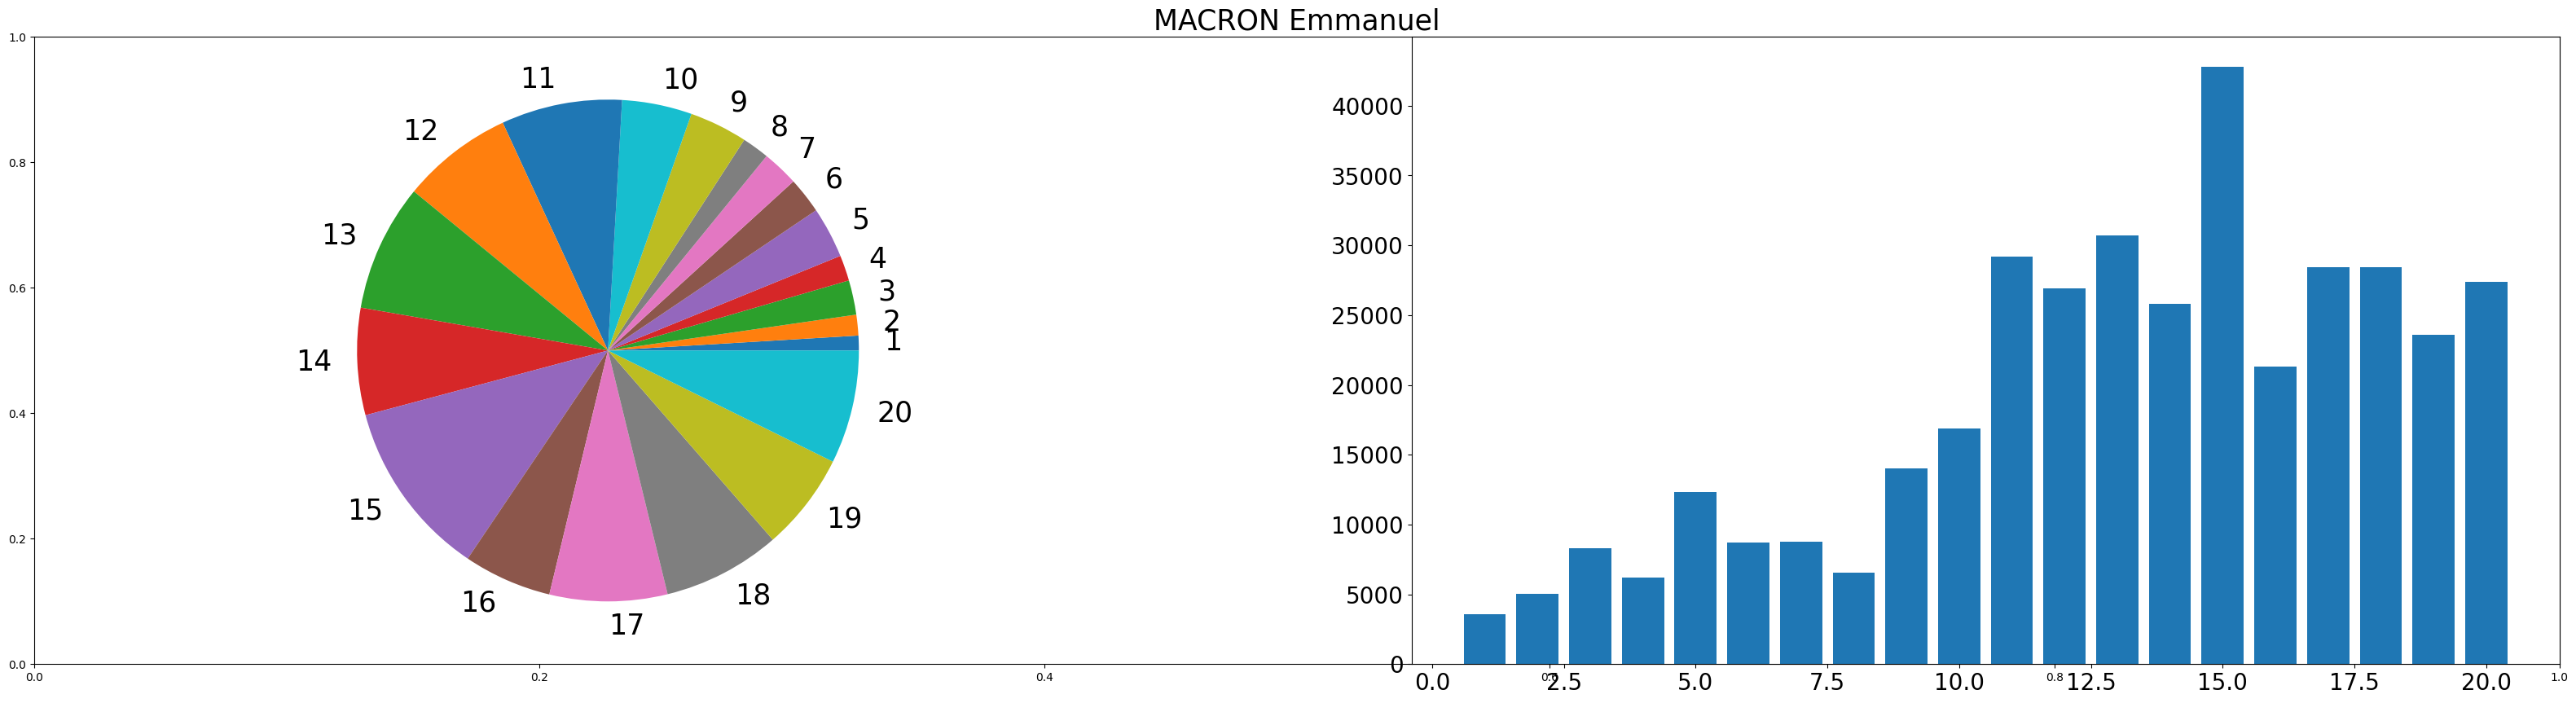

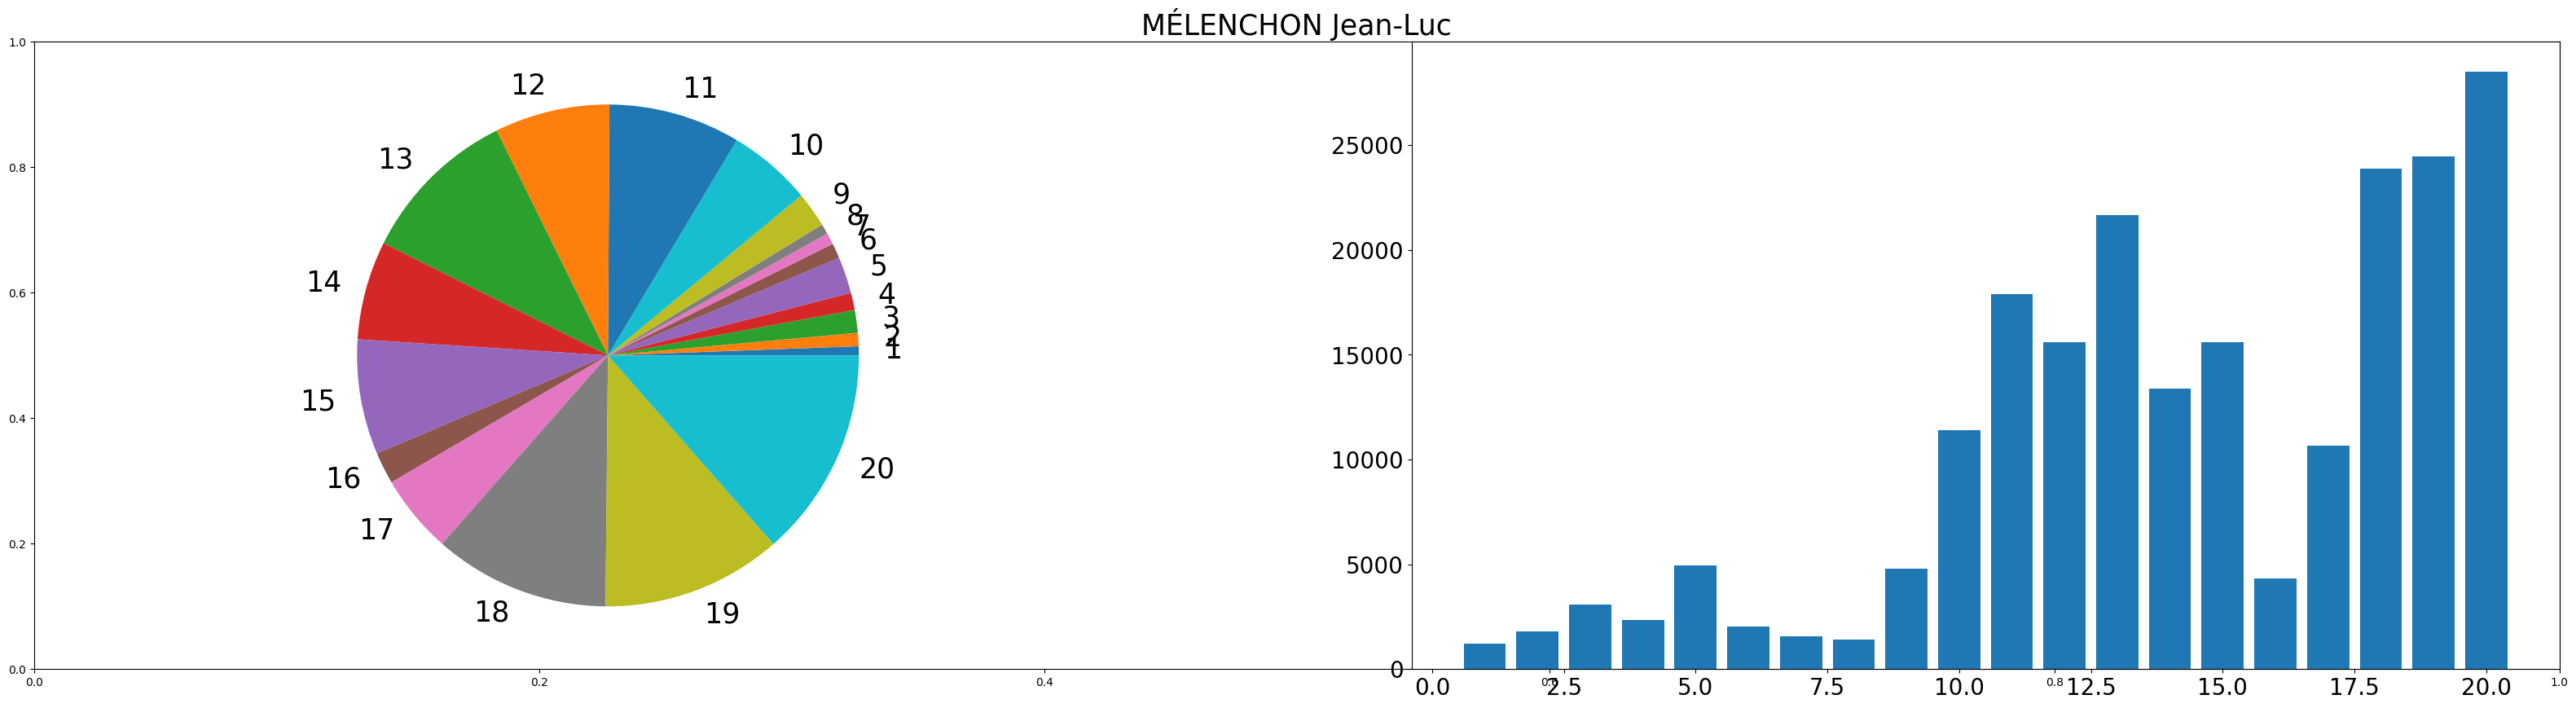

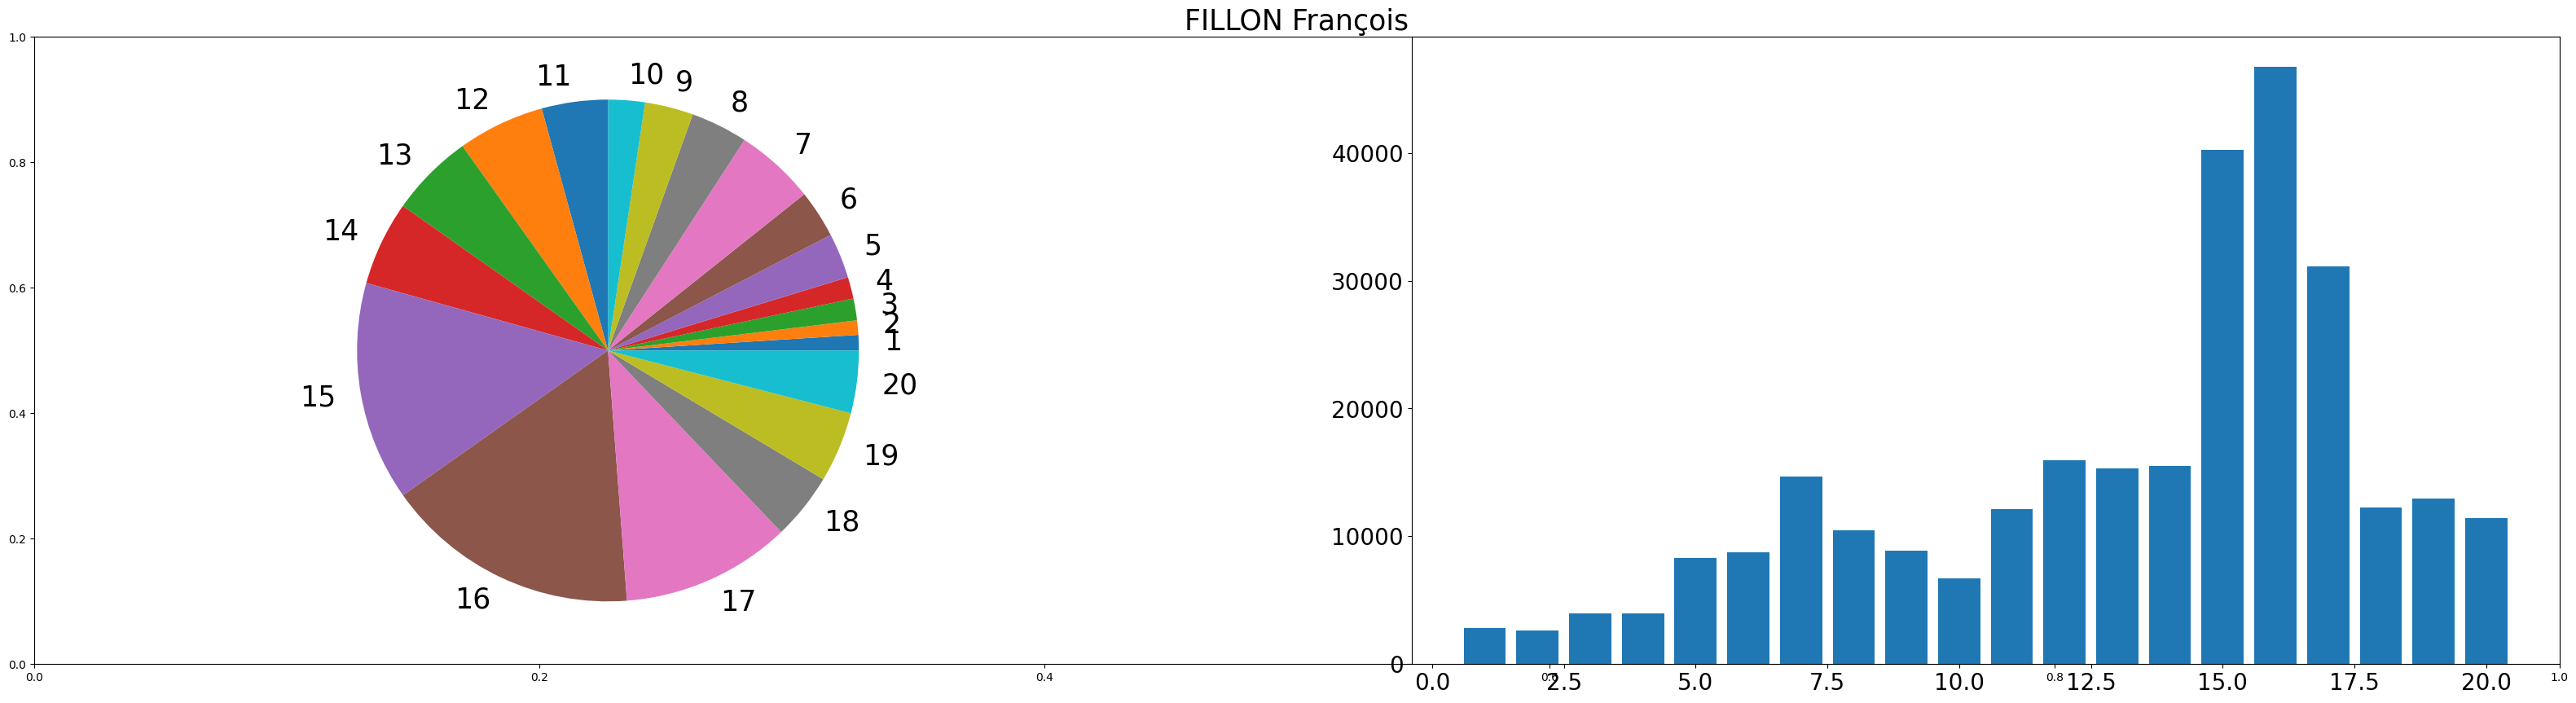

In [13]:
# Liste avec les noms des candidats à utiliser
candidats = ['LE PEN Marine', 'MACRON Emmanuel','MÉLENCHON Jean-Luc', 'FILLON François']

for i in candidats:
    fig = matplotlib.pyplot.figure(figsize=(40,10)) # Créer la figure
    matplotlib.pyplot.title(f'{i}', size=25) # Title
    ax1 = fig.add_subplot(121) # Graphique de gauche
    ax2 = fig.add_subplot(122) # Graphique de droit
    ax1.pie(sum_par_arrond[i], labels = sum_par_arrond.index, textprops={'fontsize': 25}) # Graphique circulaire du dernier tableau créé
    ax2.bar(sum_par_arrond.index, sum_par_arrond[i]) # Graphique des barres du dernier tableau créé
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)


7 - Représenter sous forme graphique d'autres données extraites de ce tableau. Vous choisirez celles qui vous paraissent représentatives.

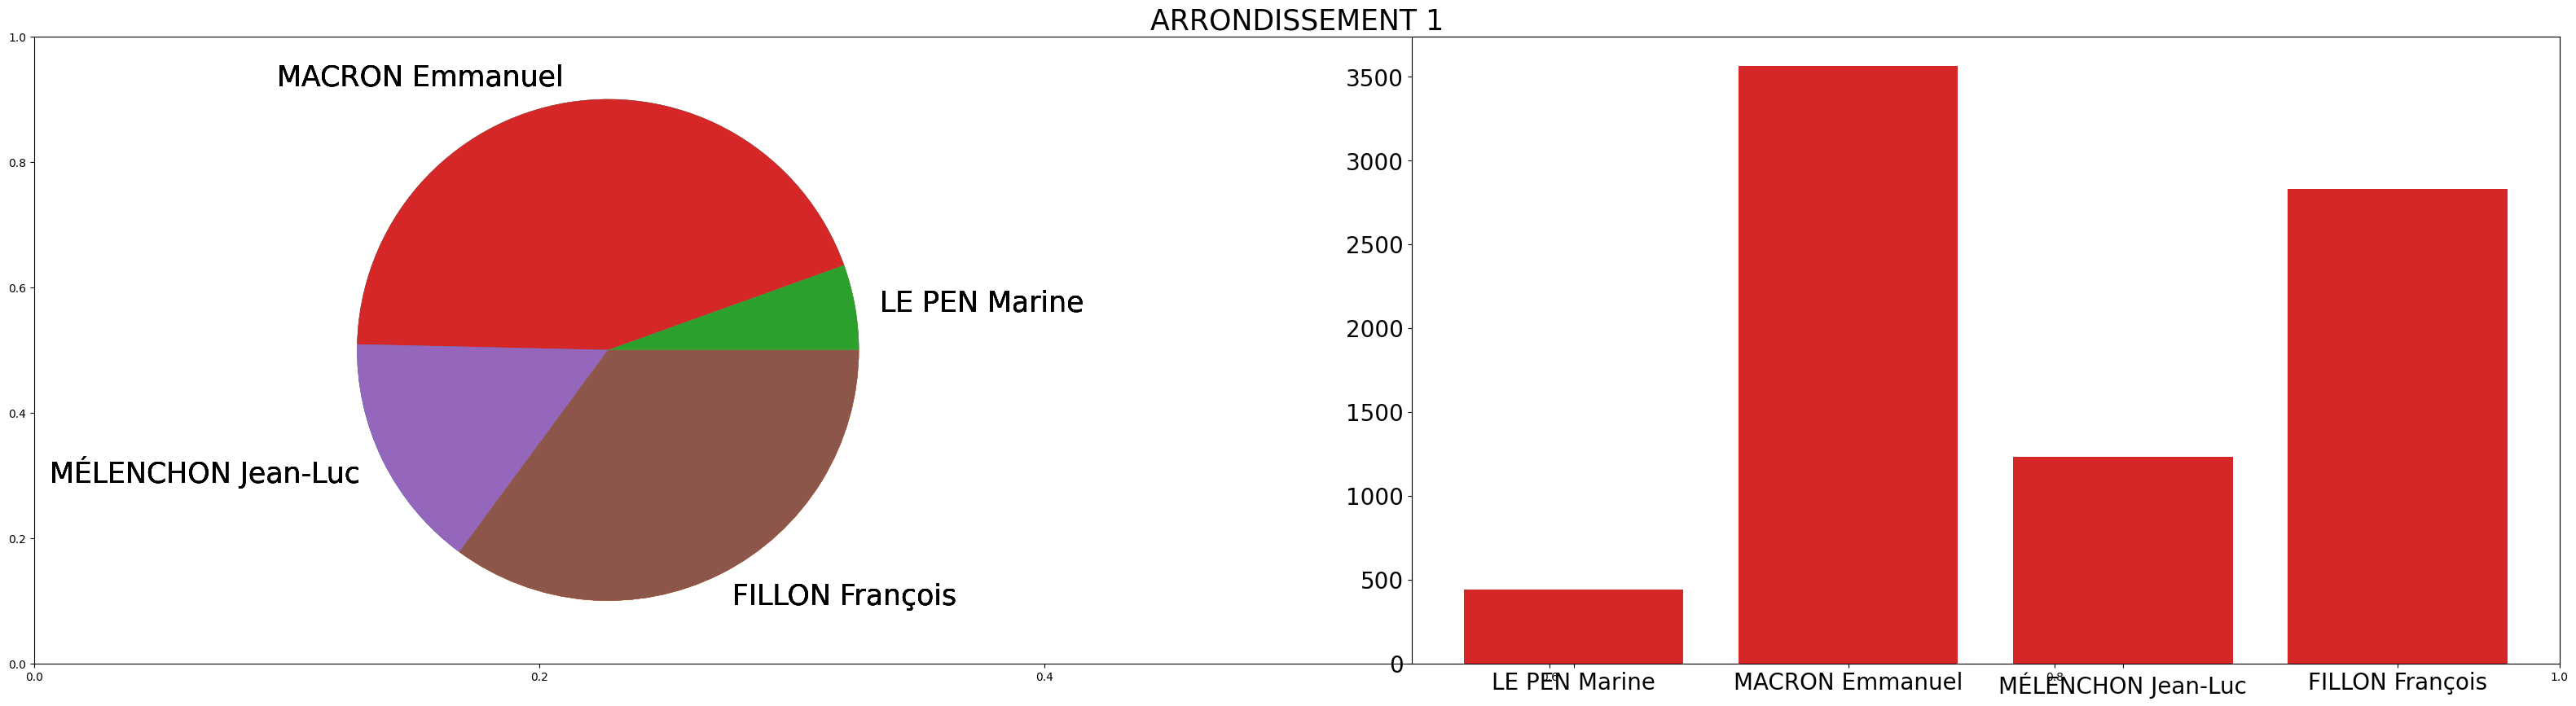

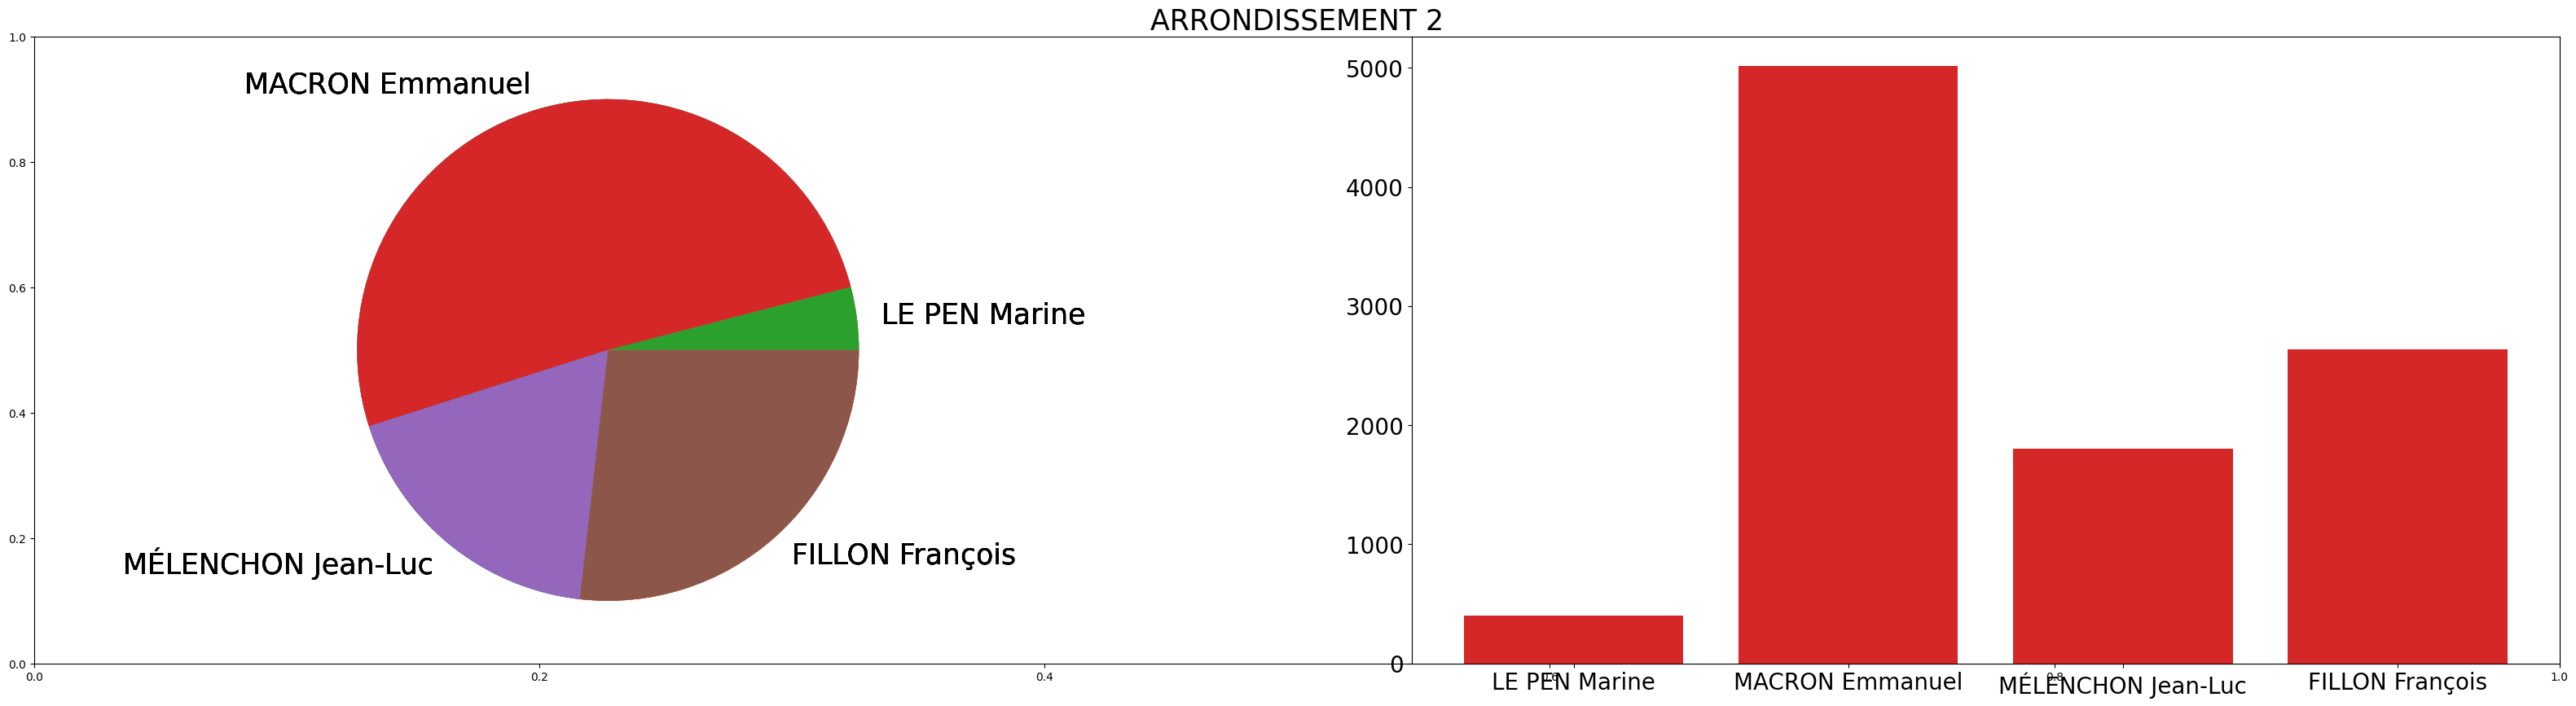

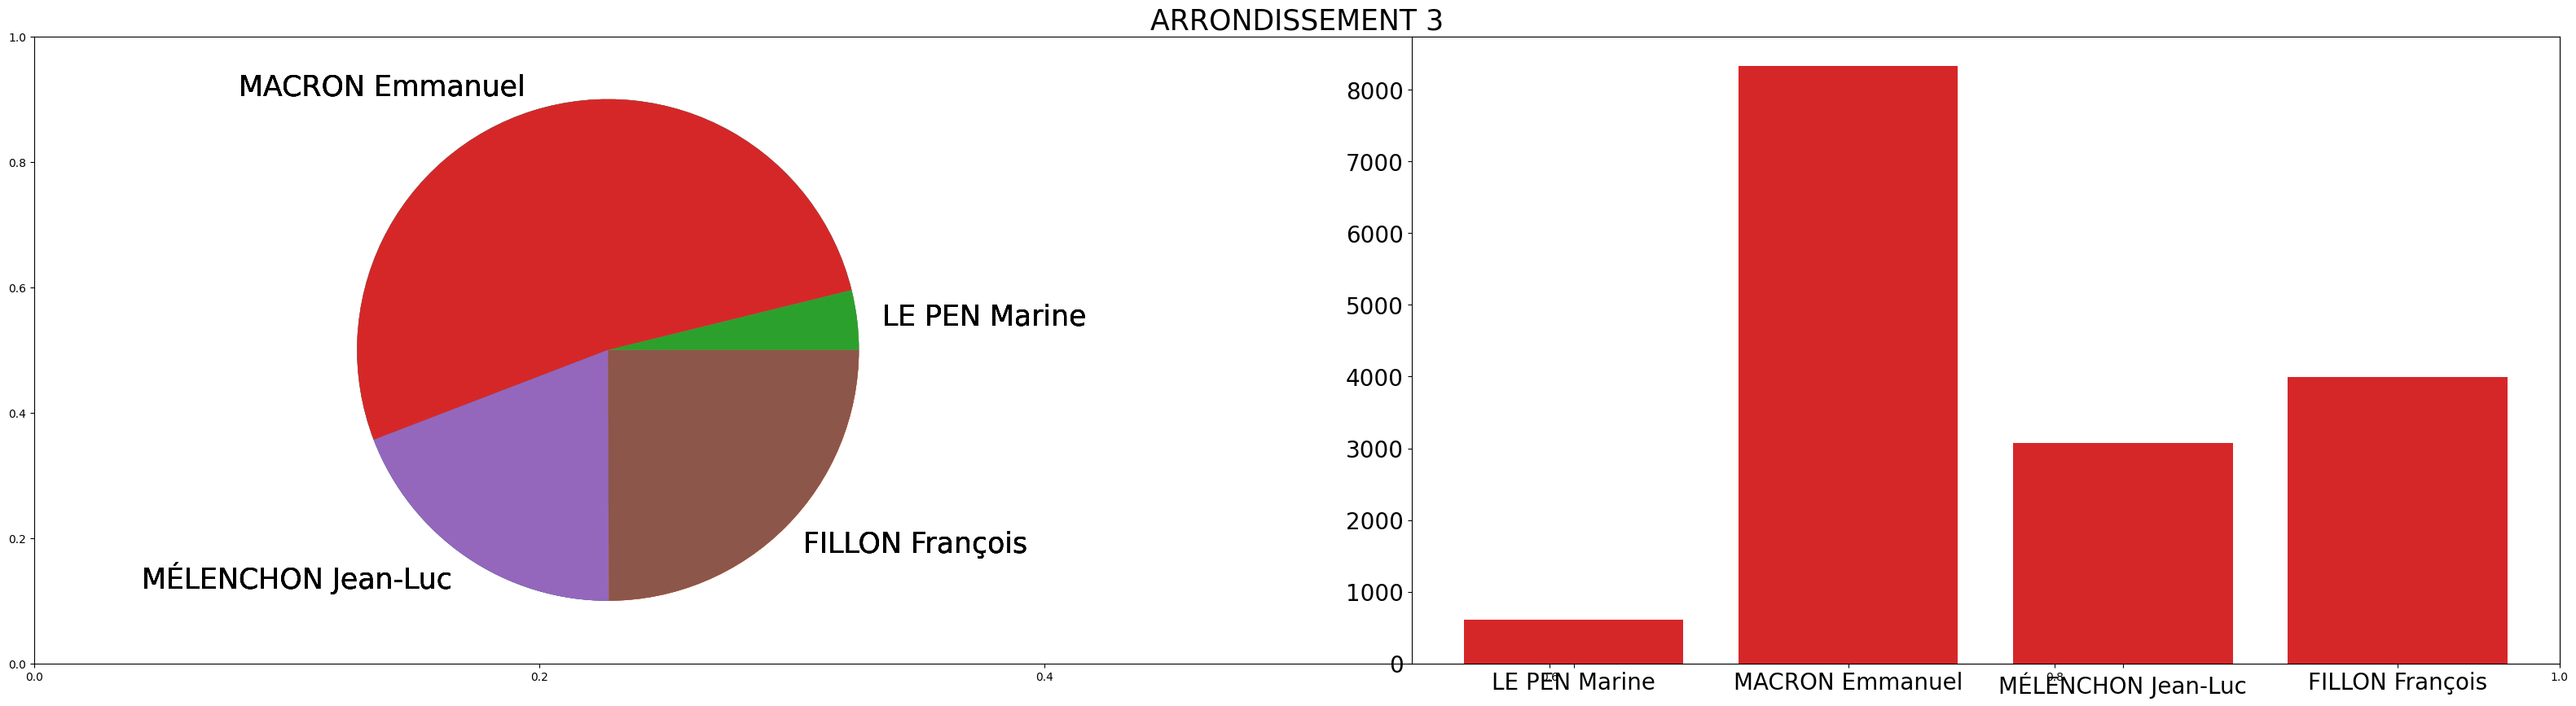

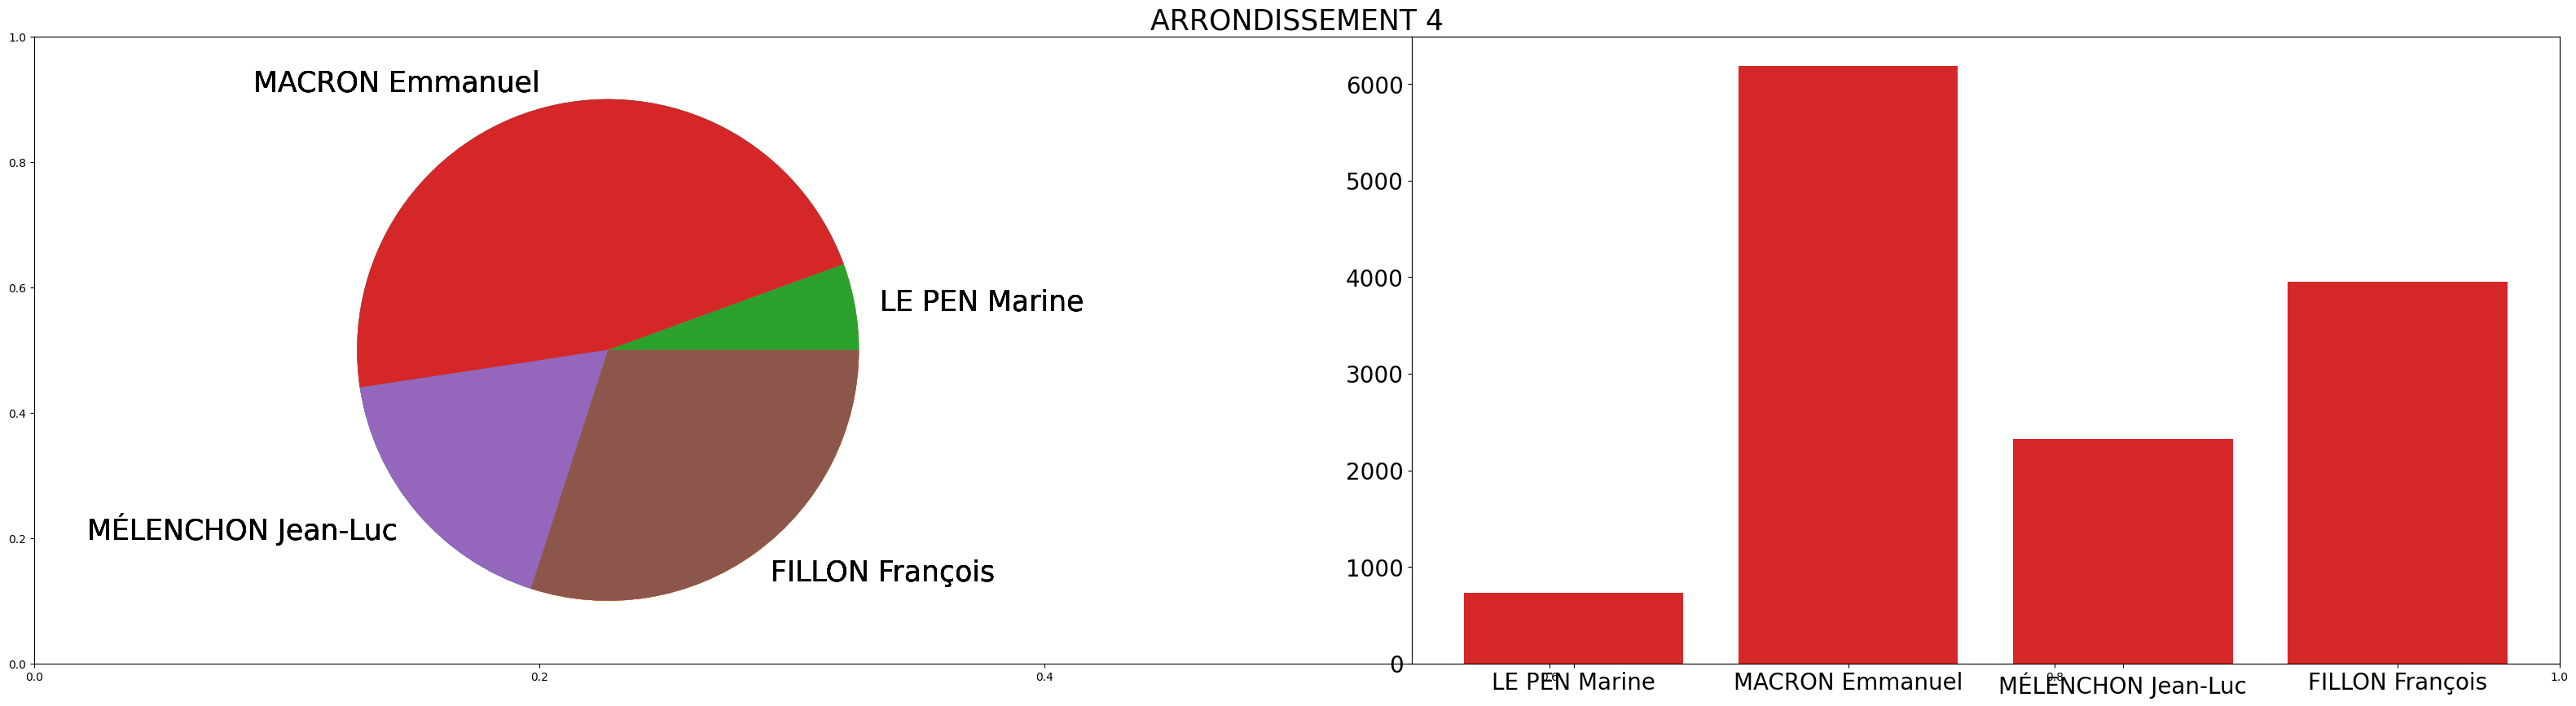

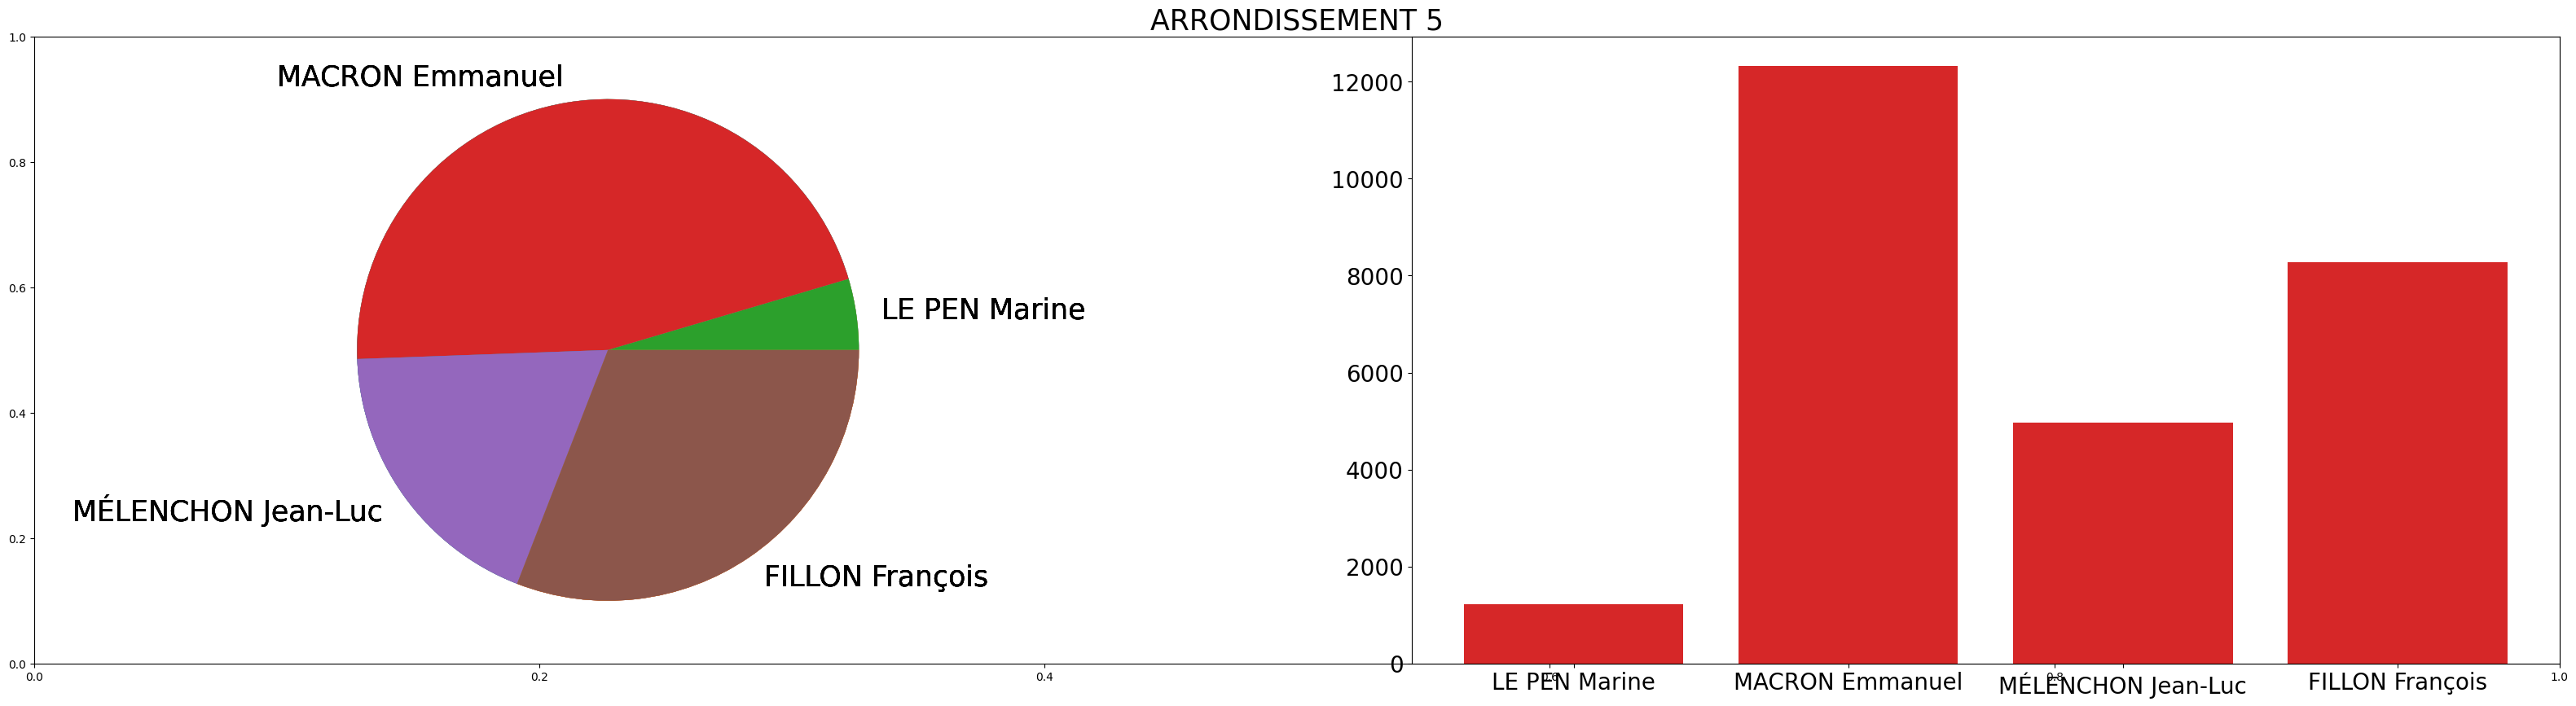

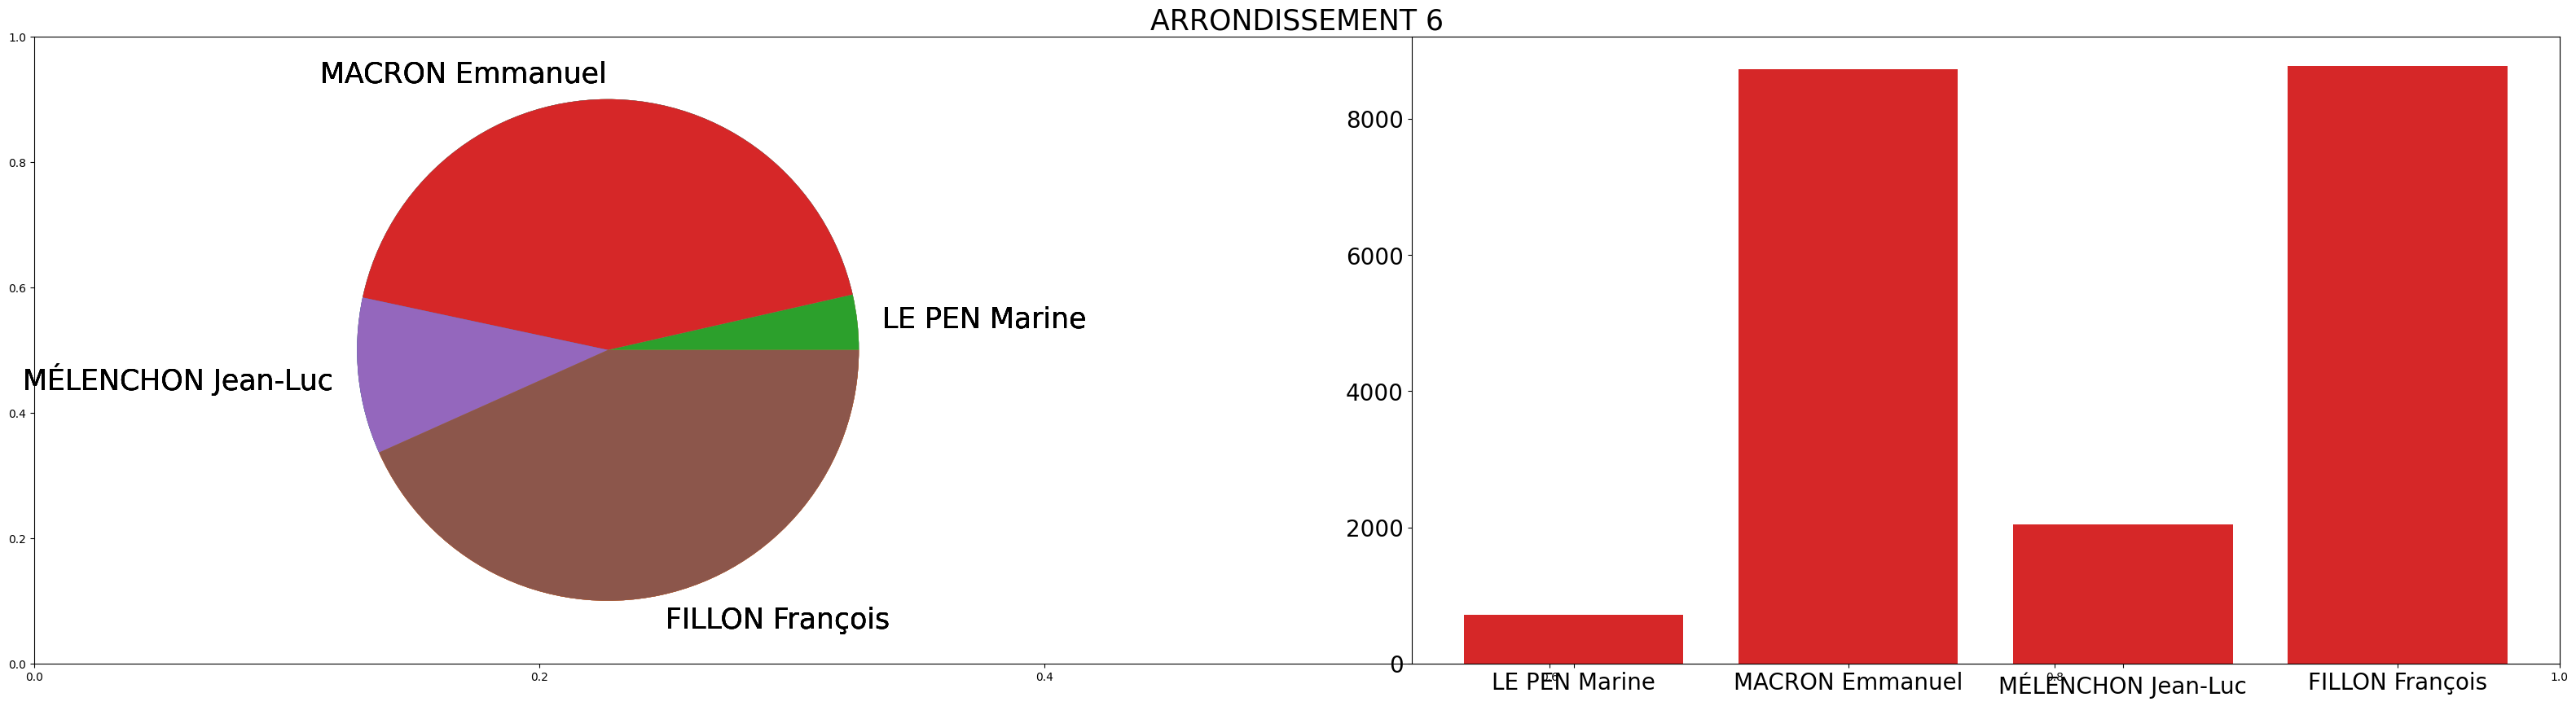

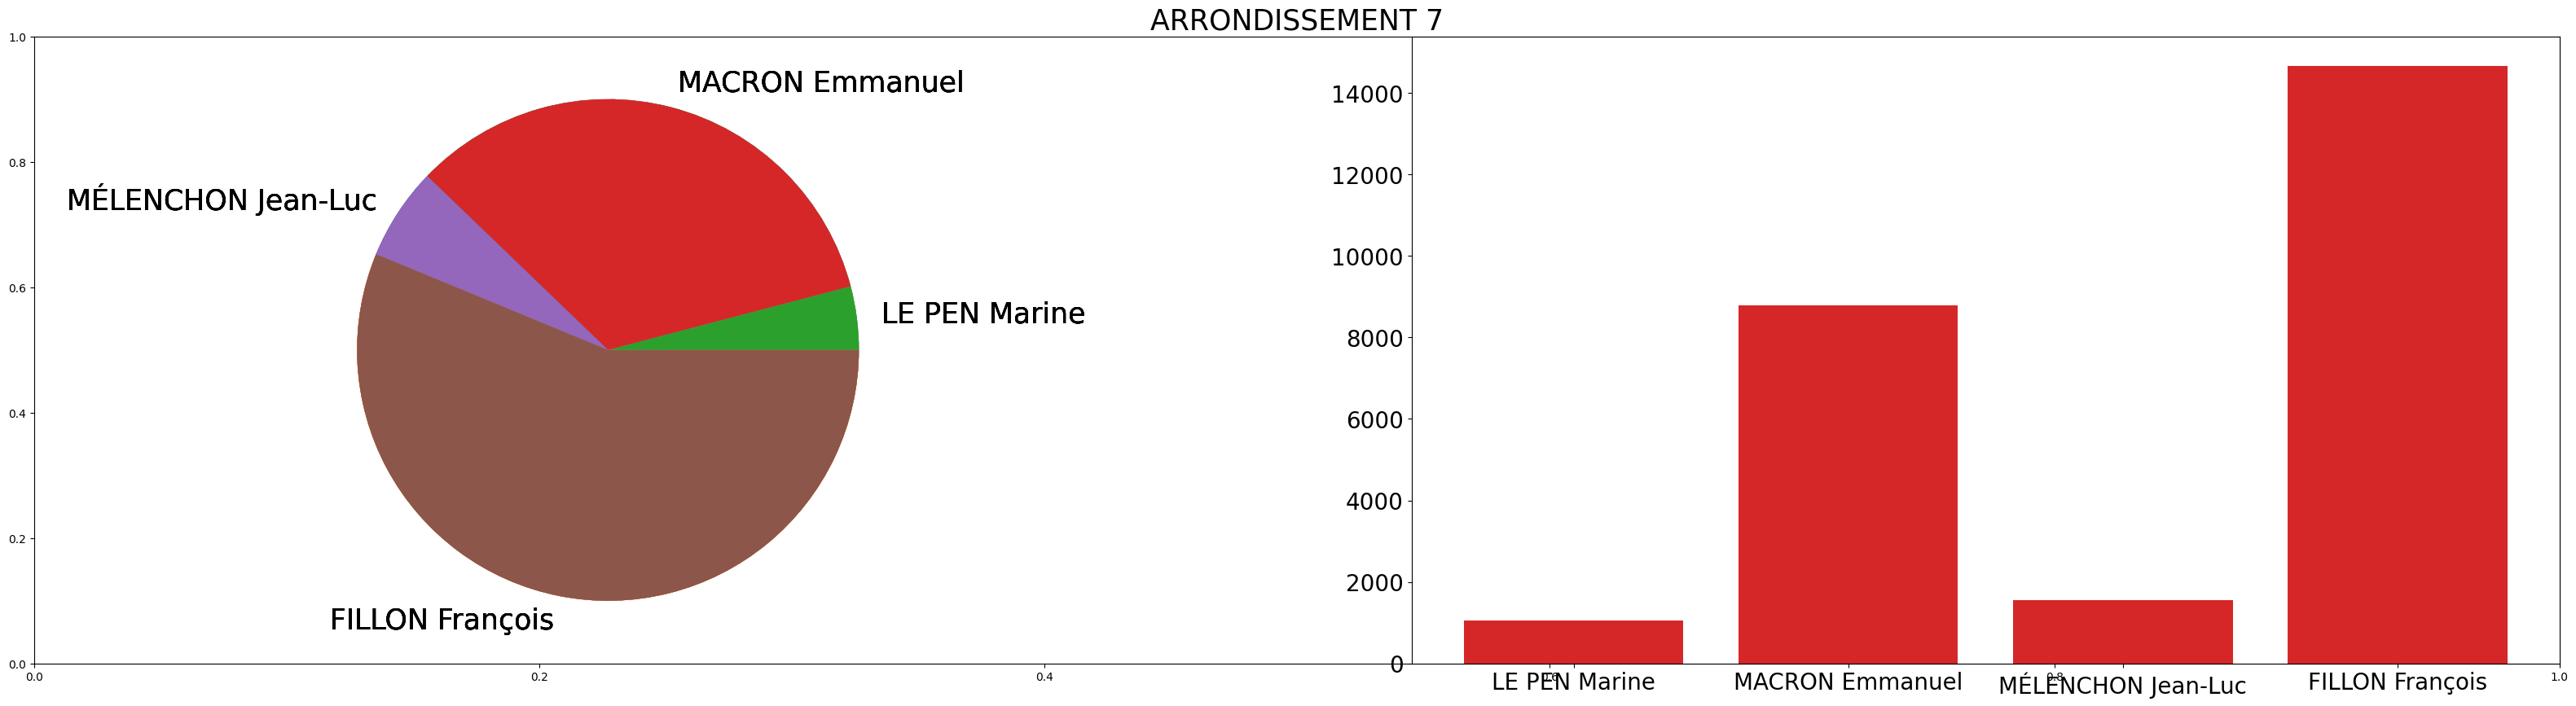

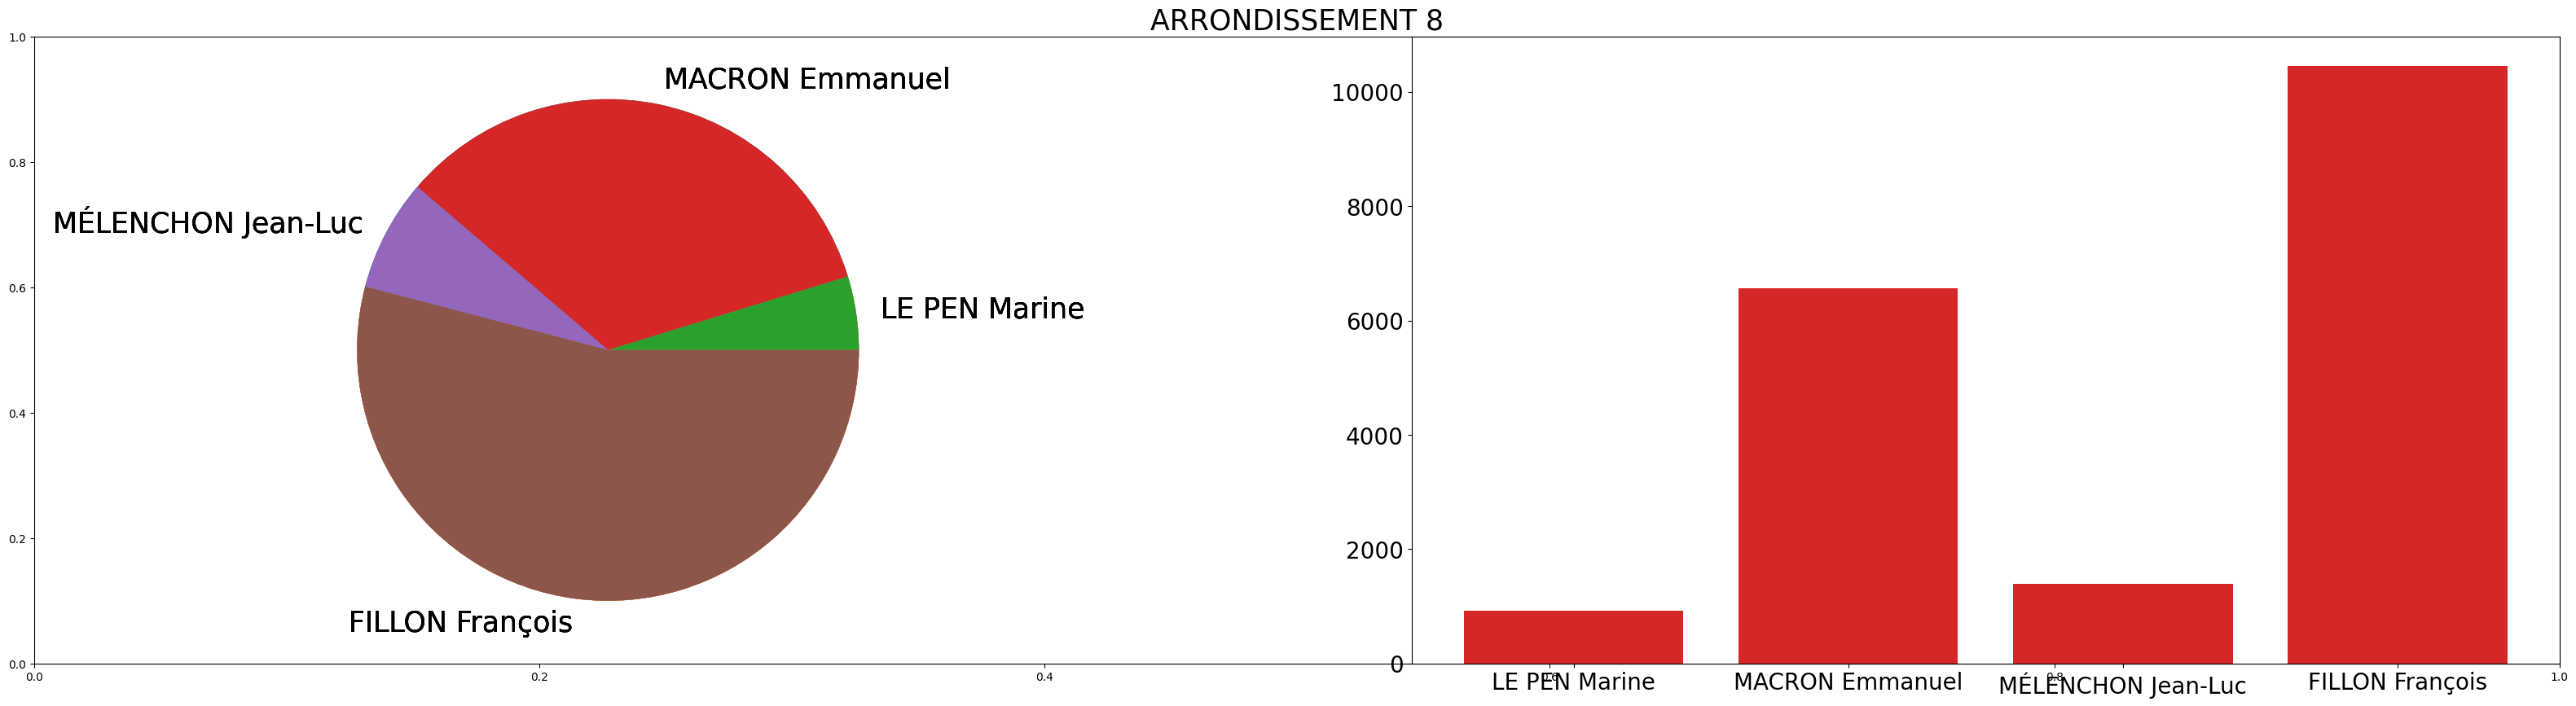

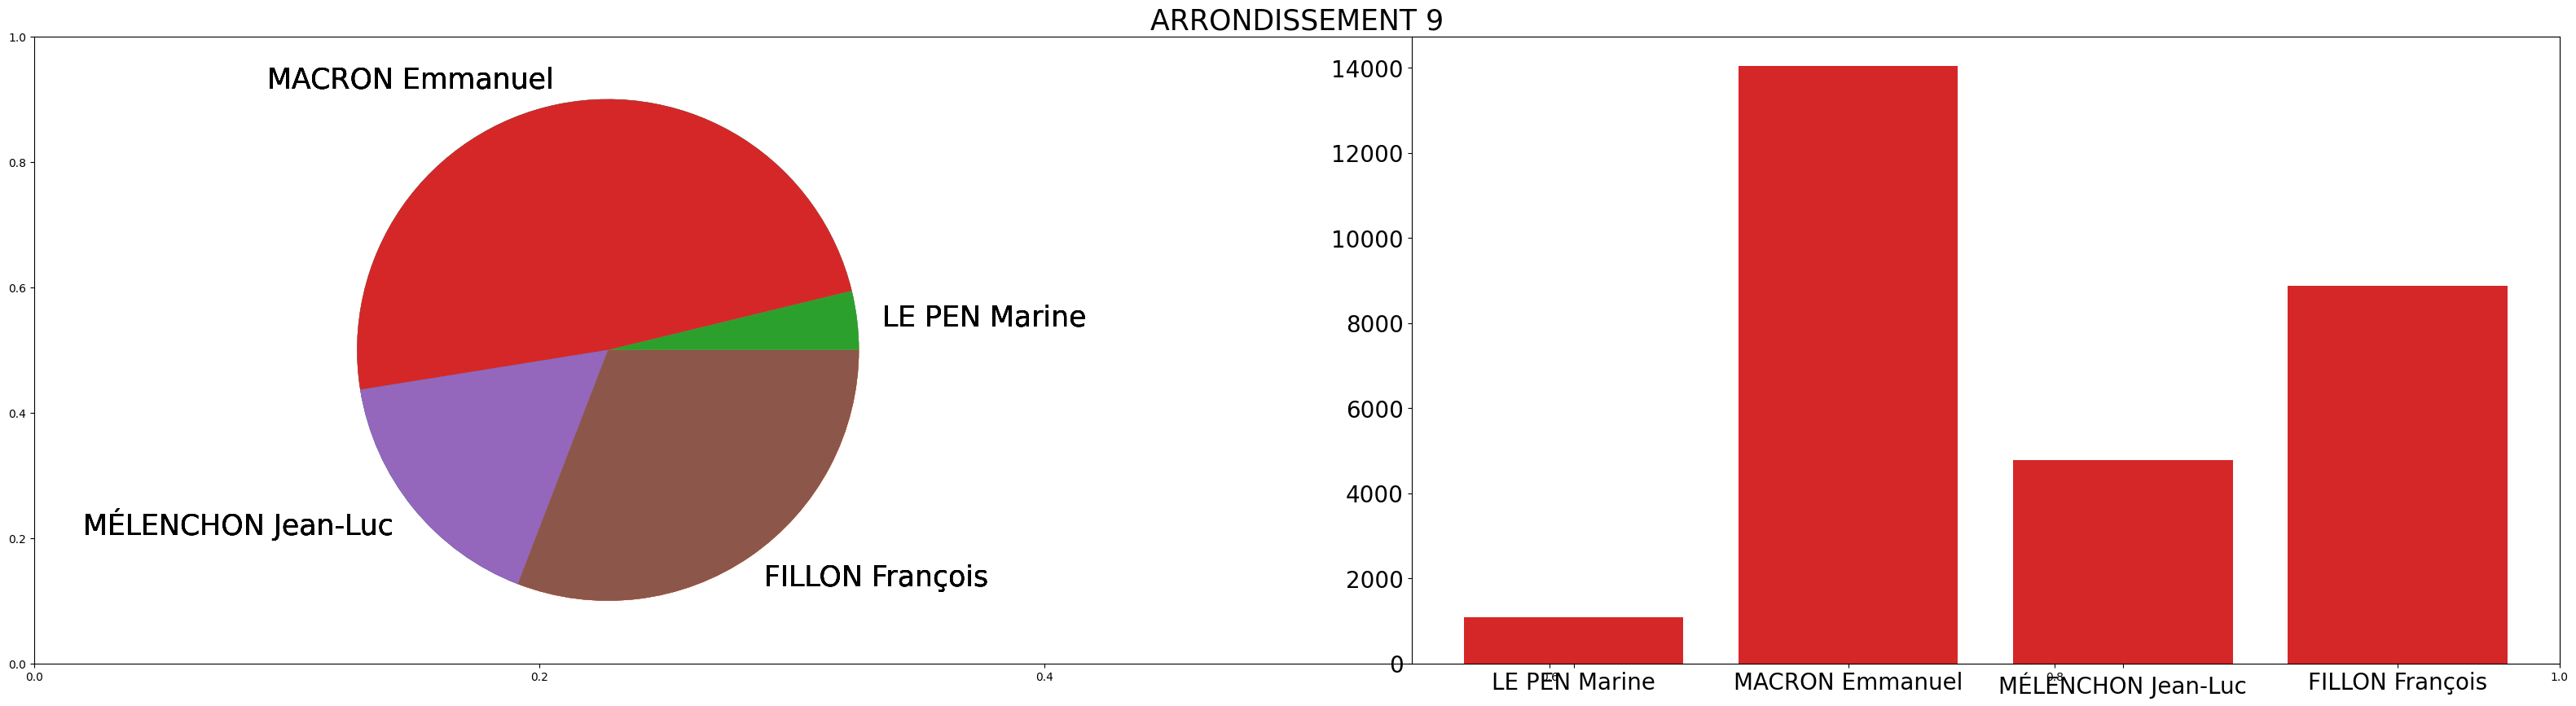

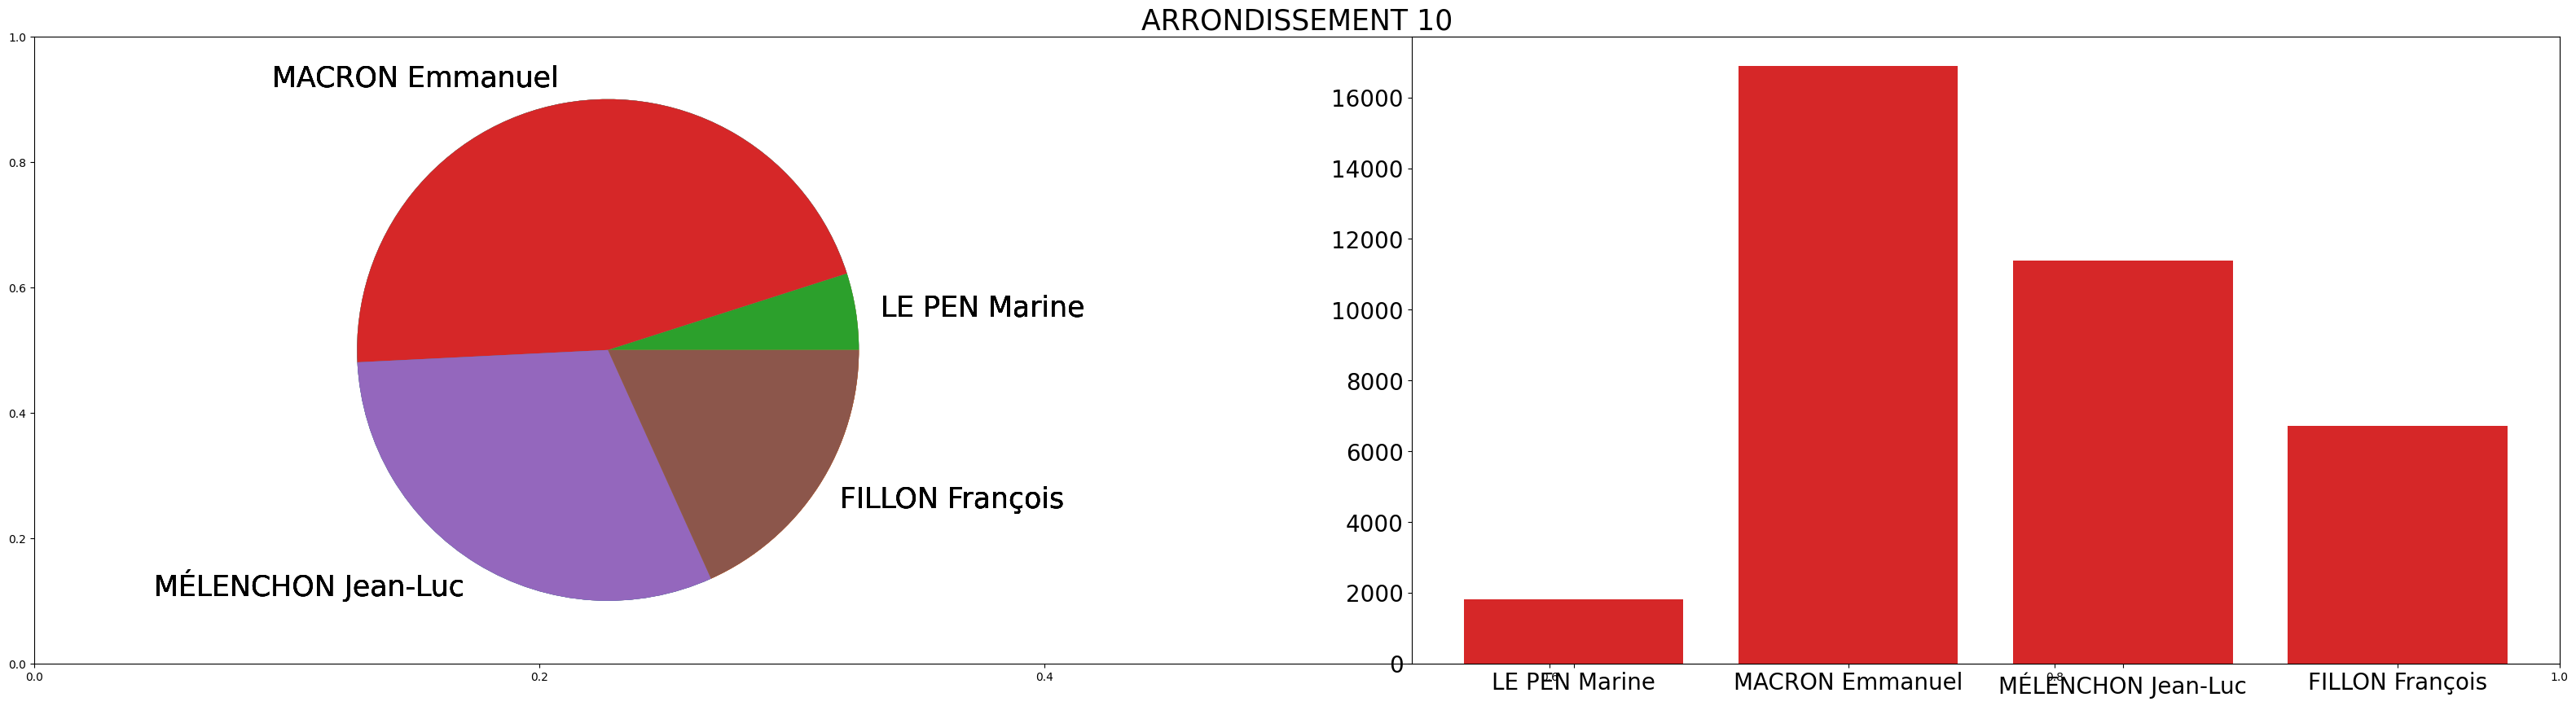

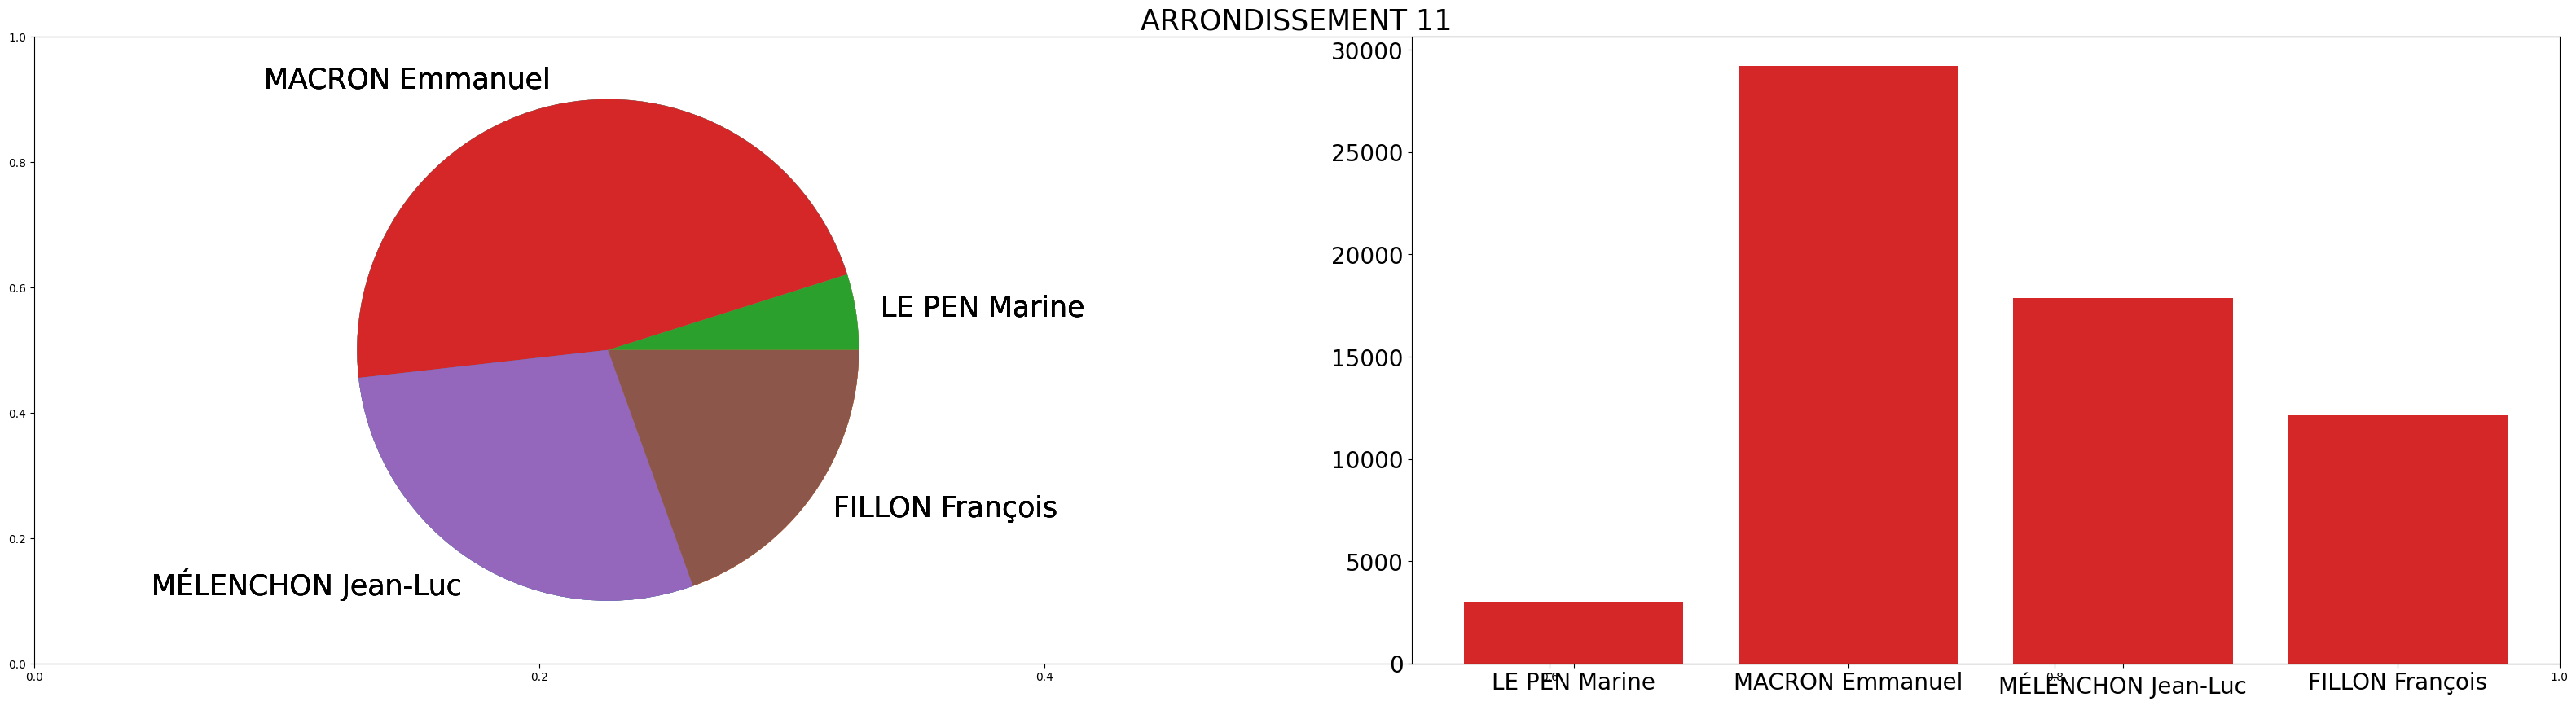

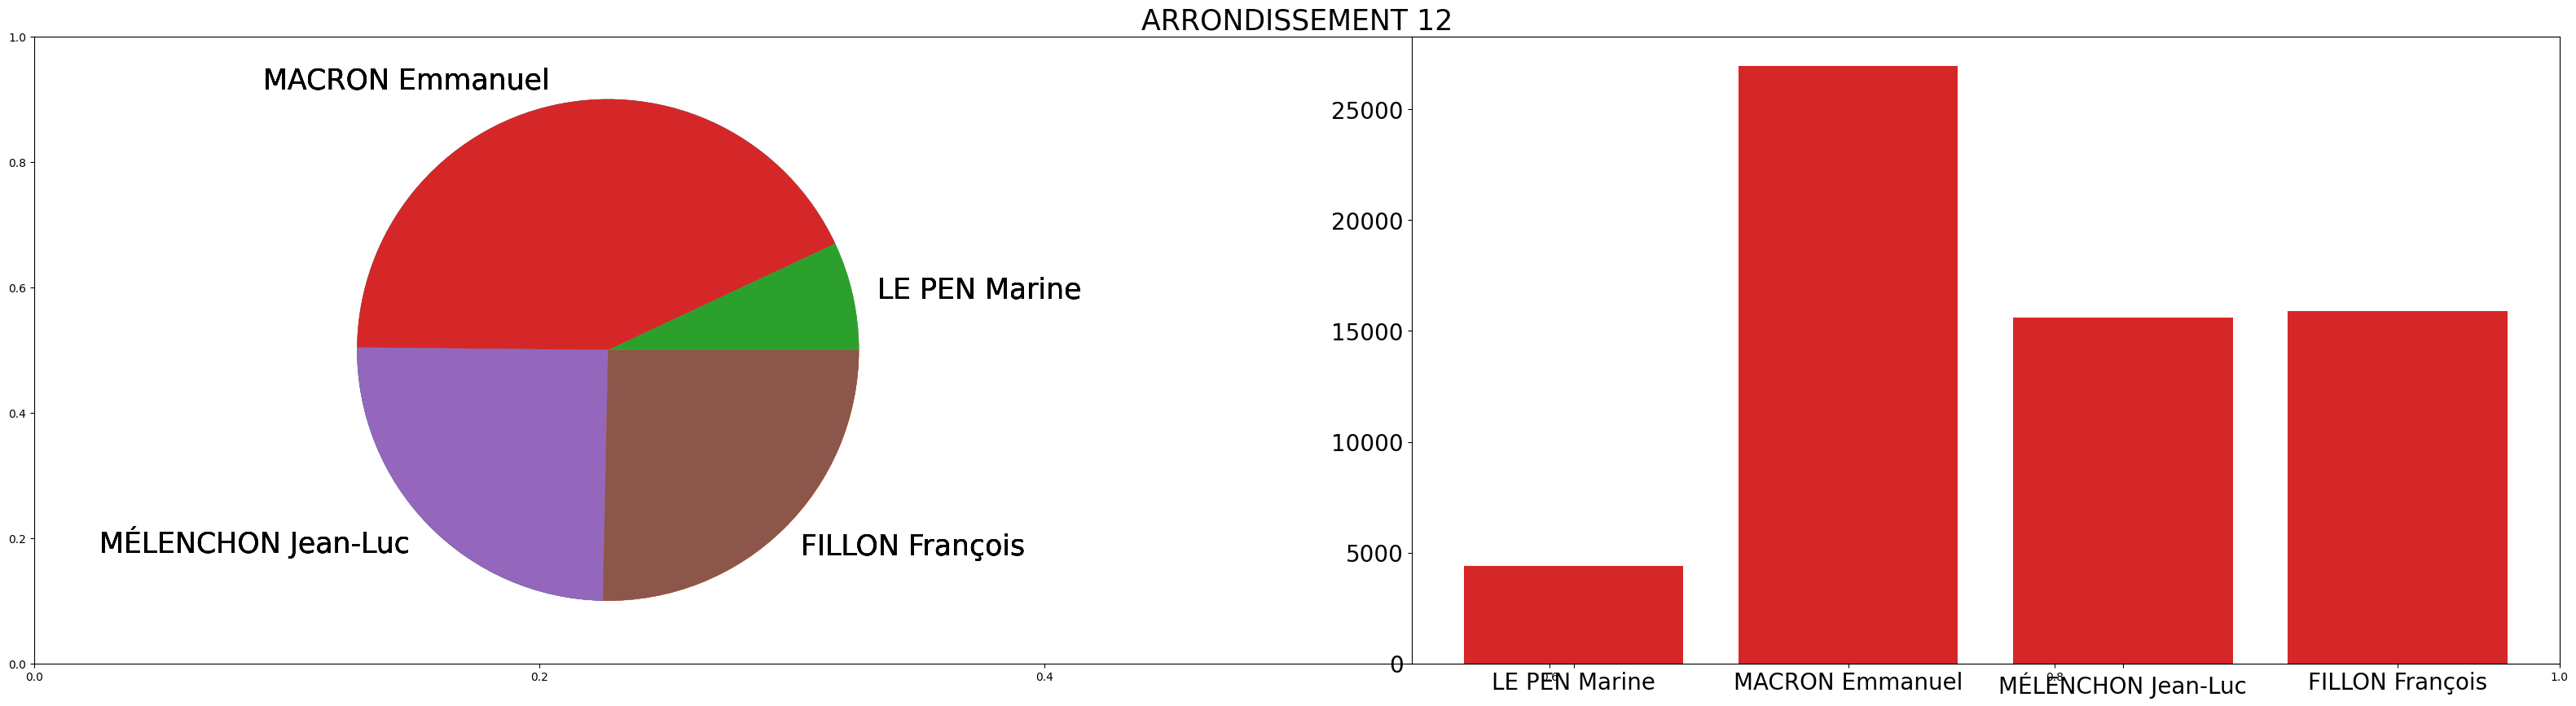

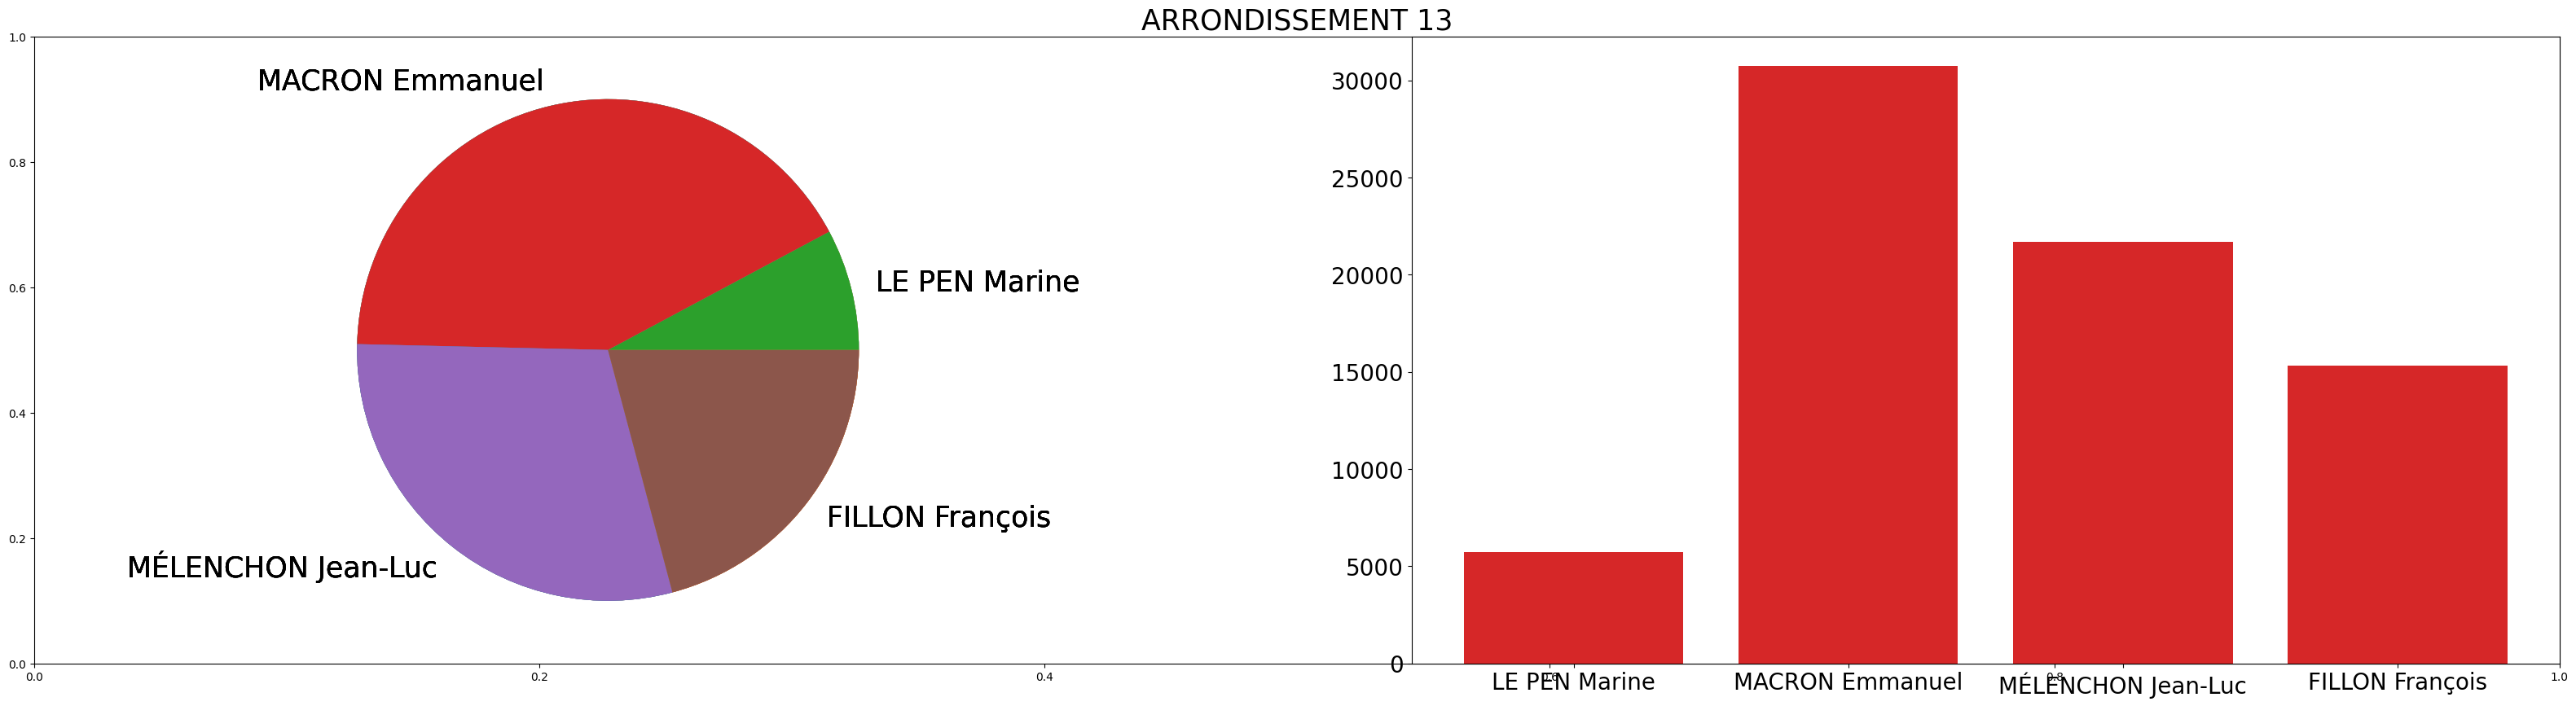

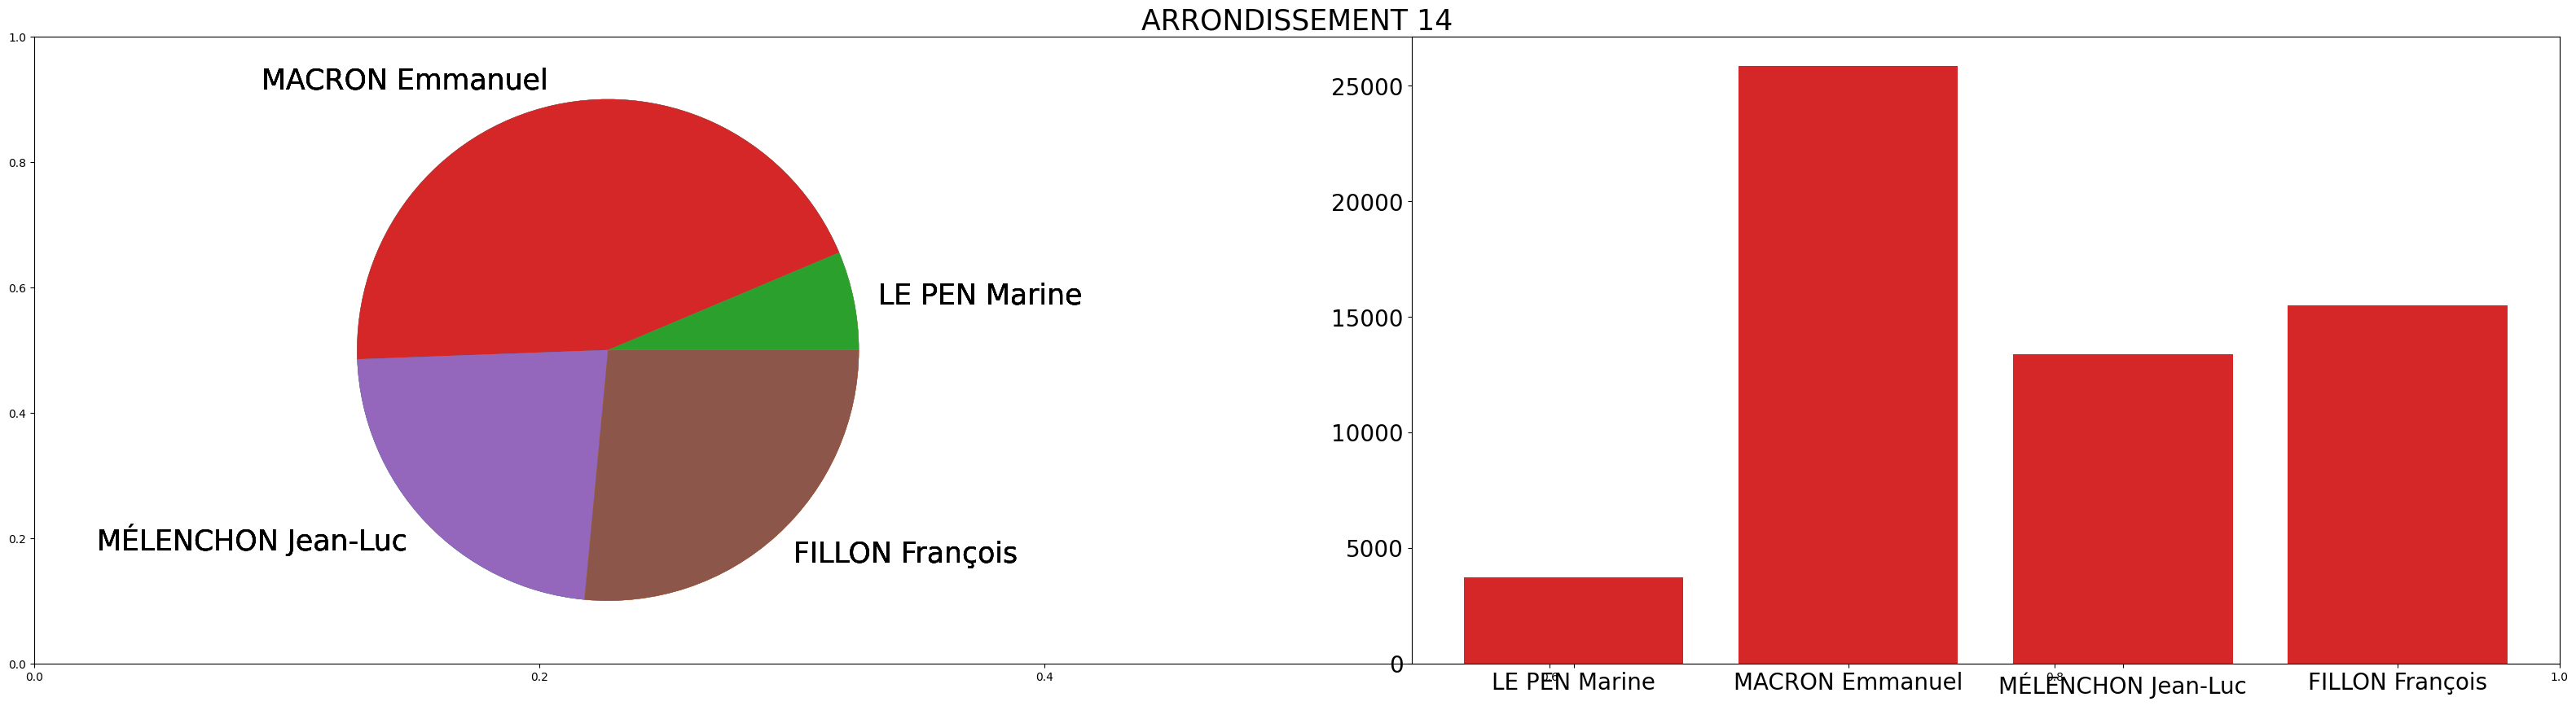

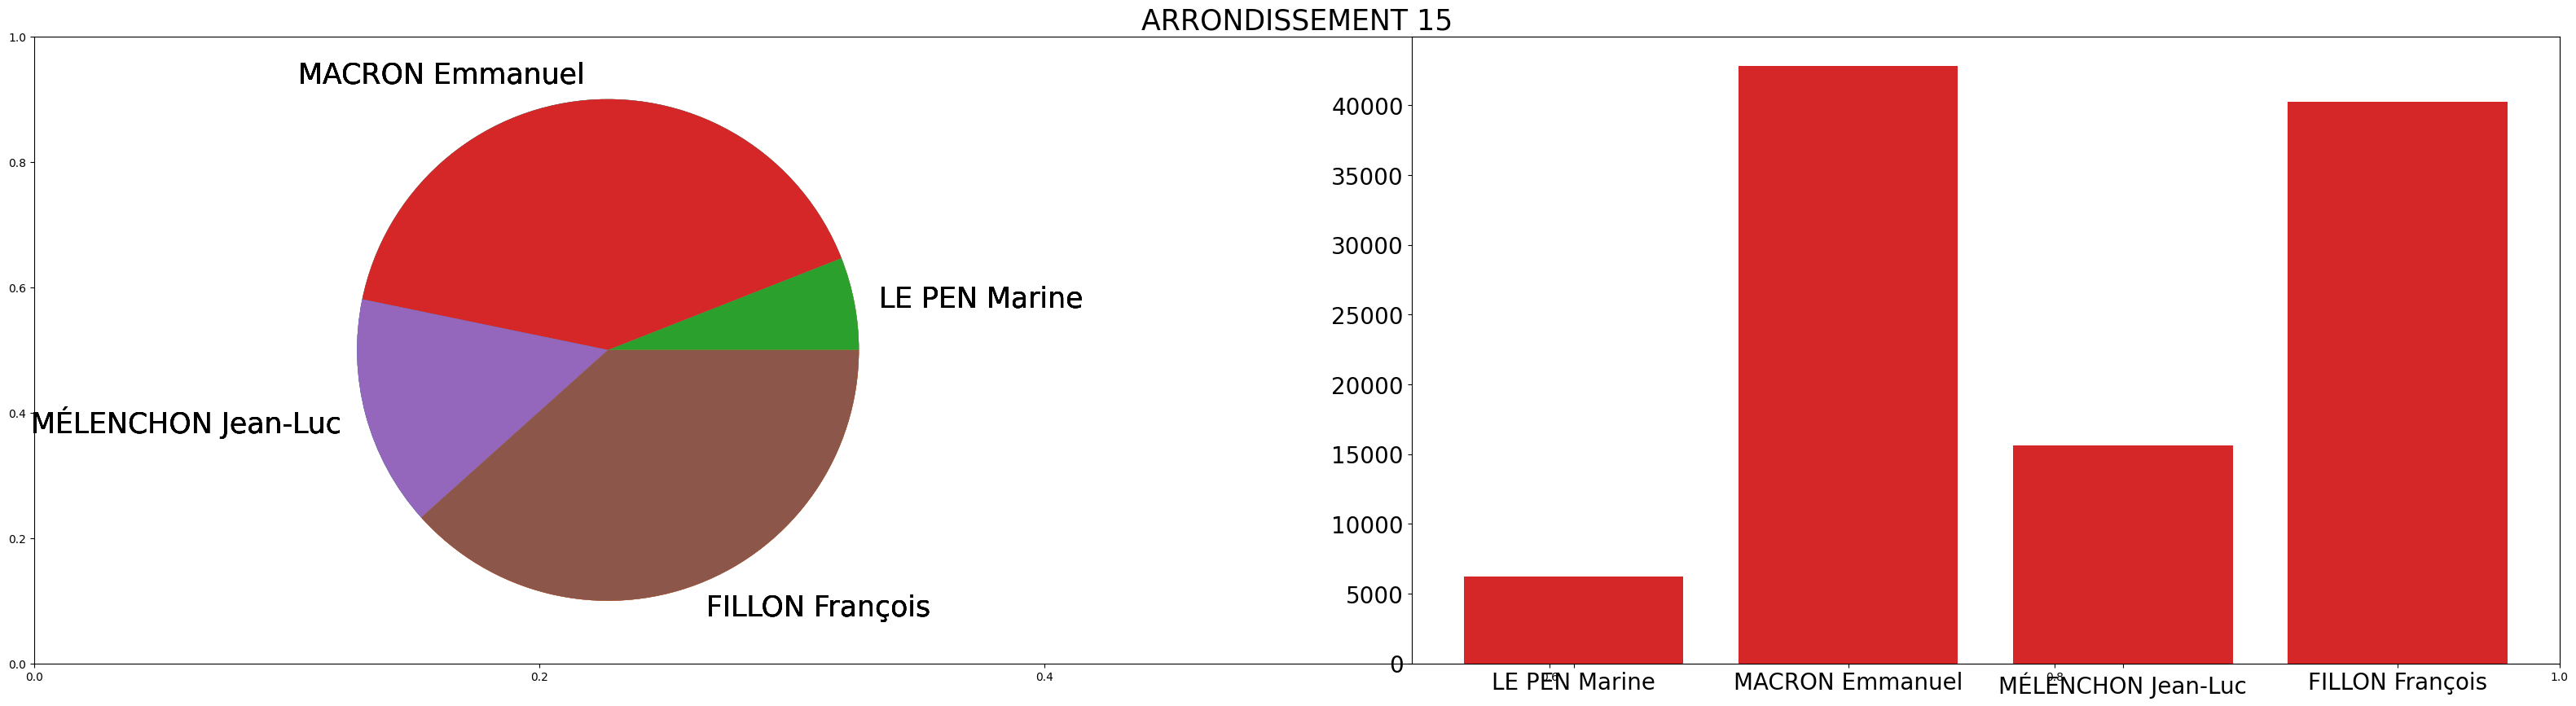

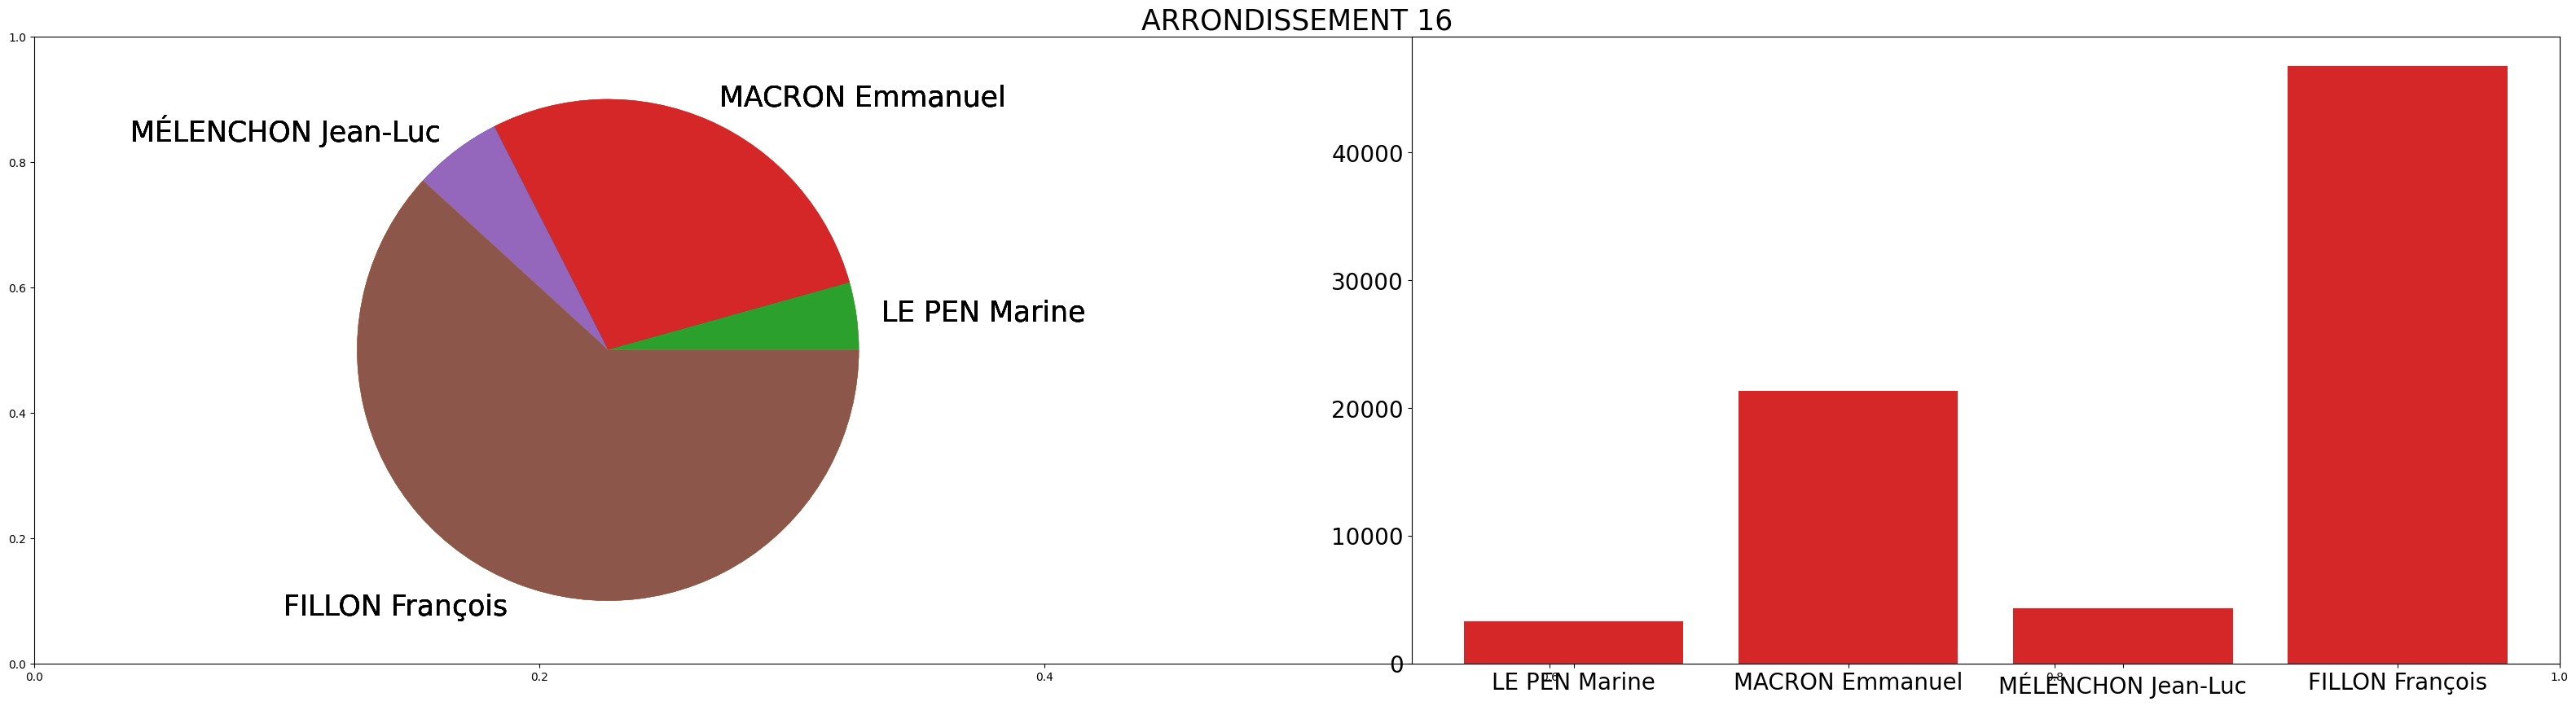

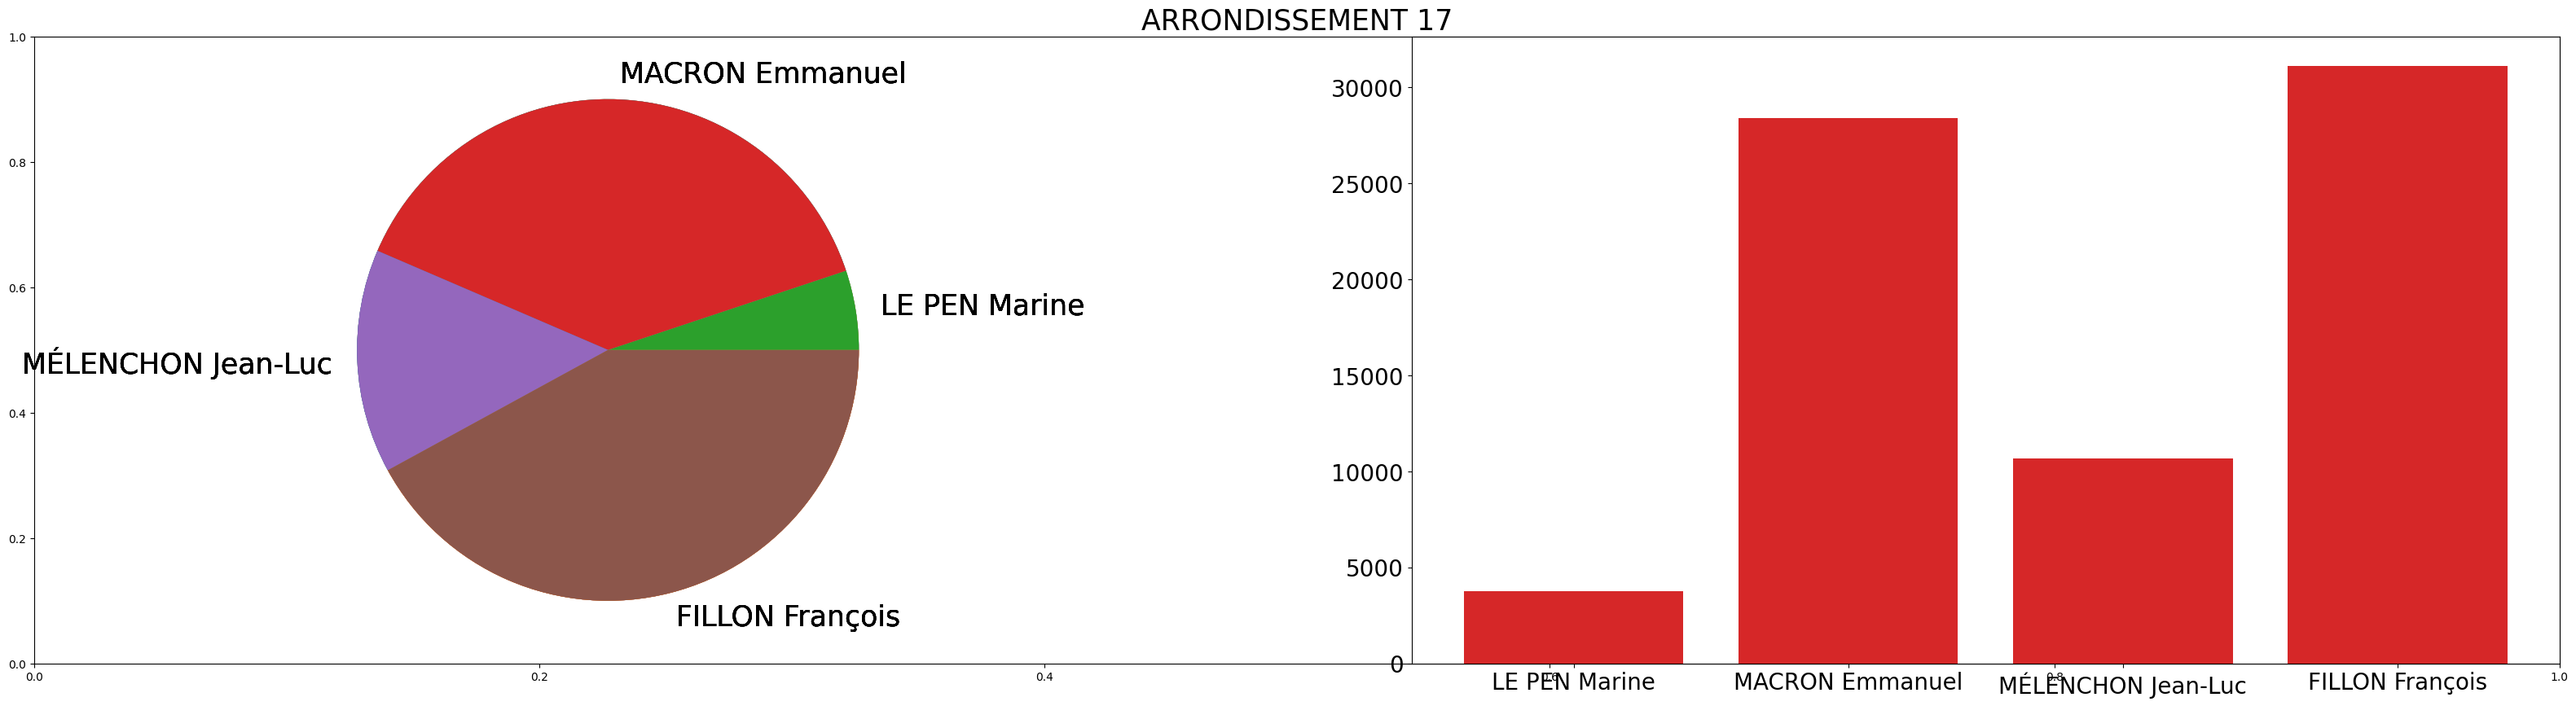

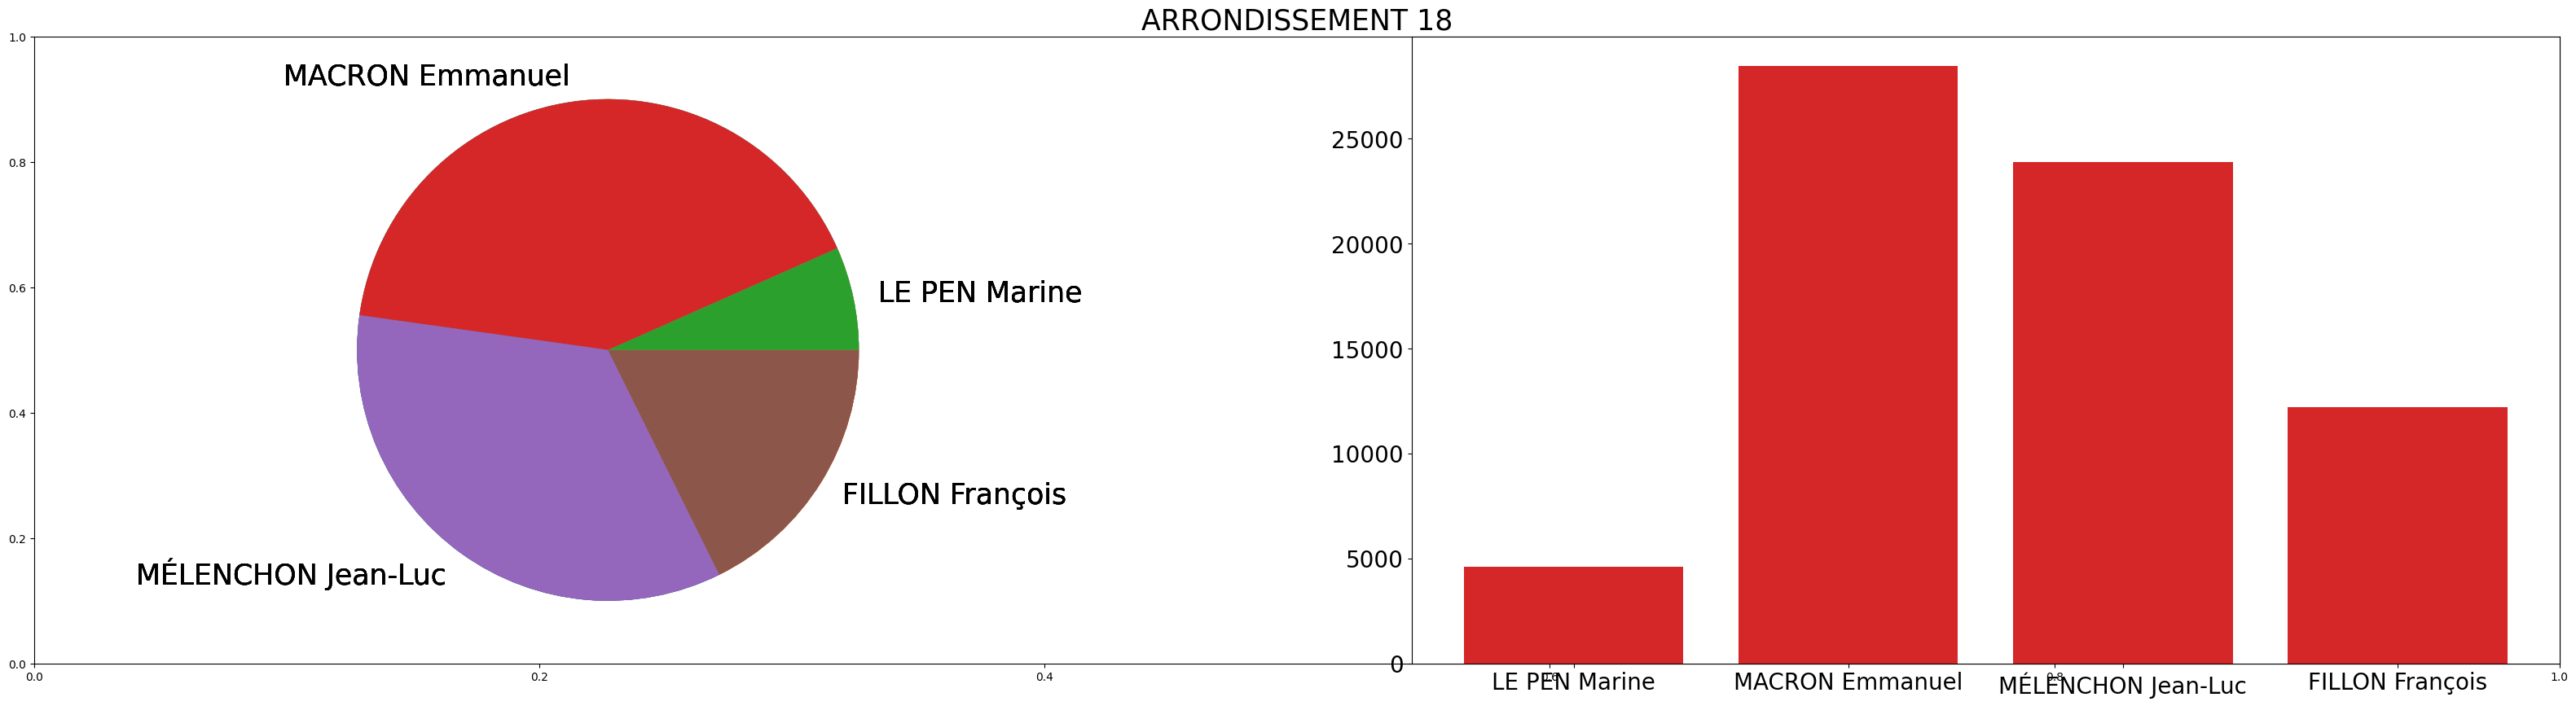

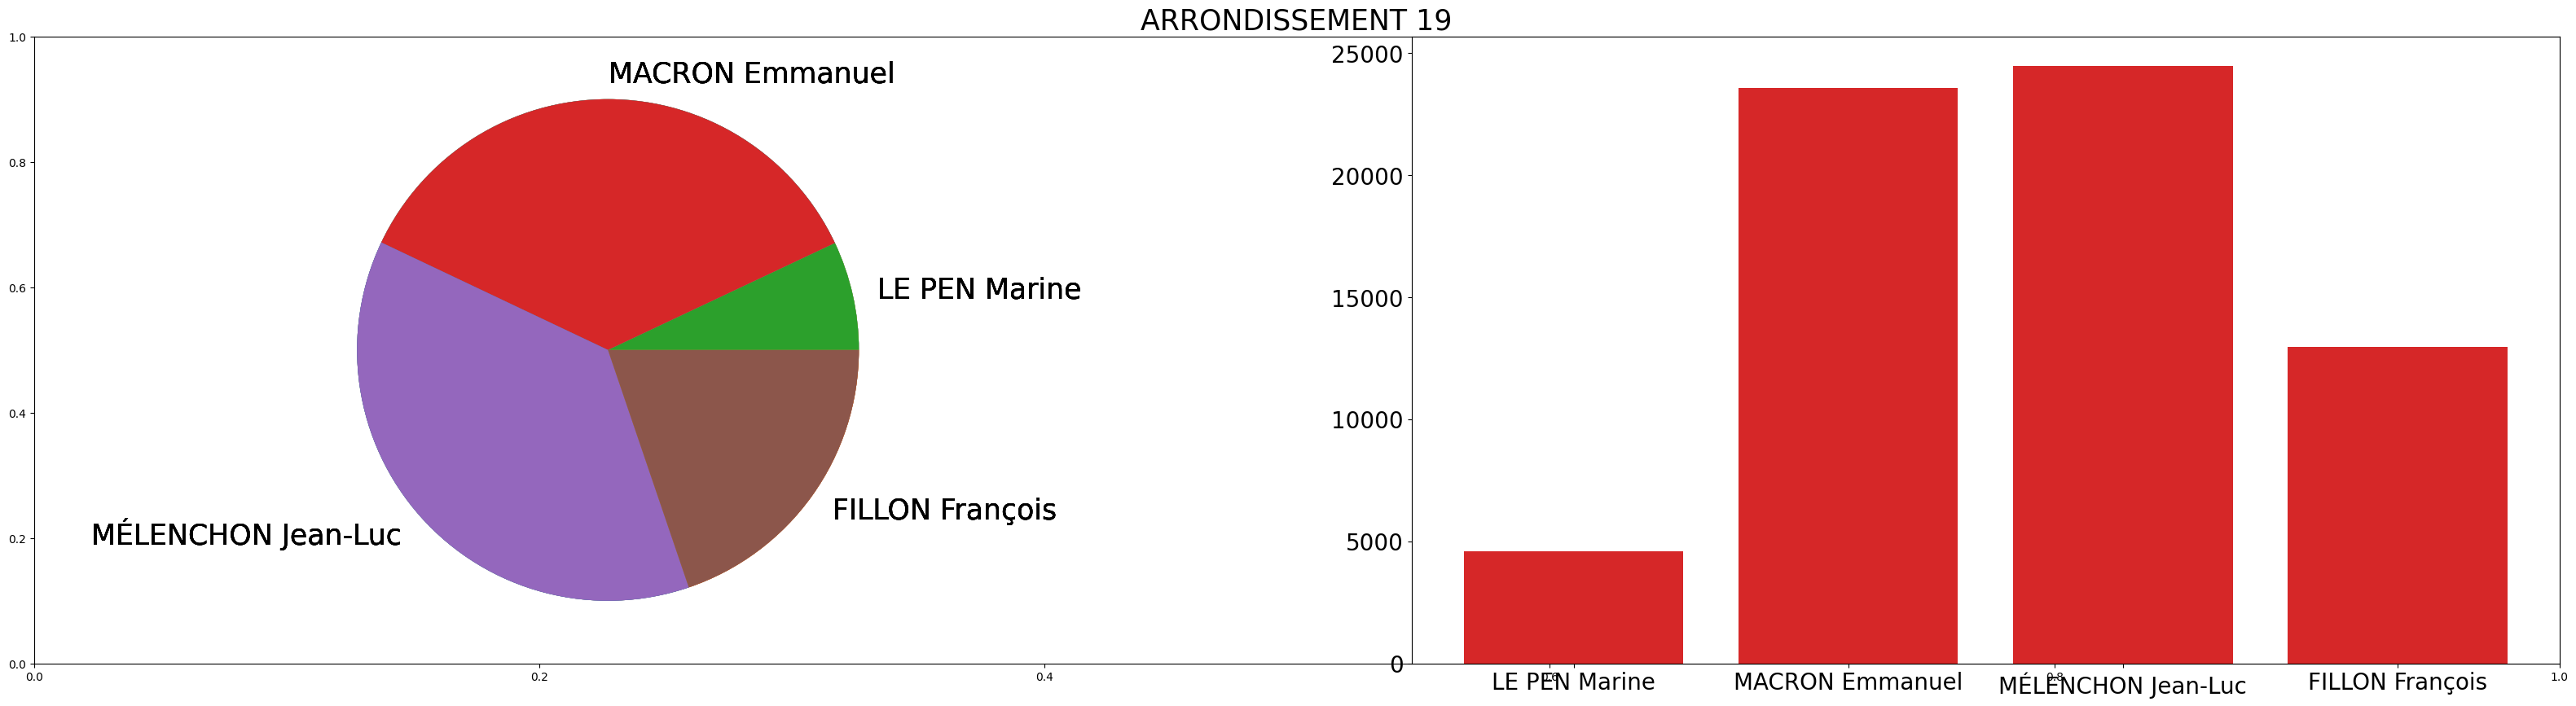

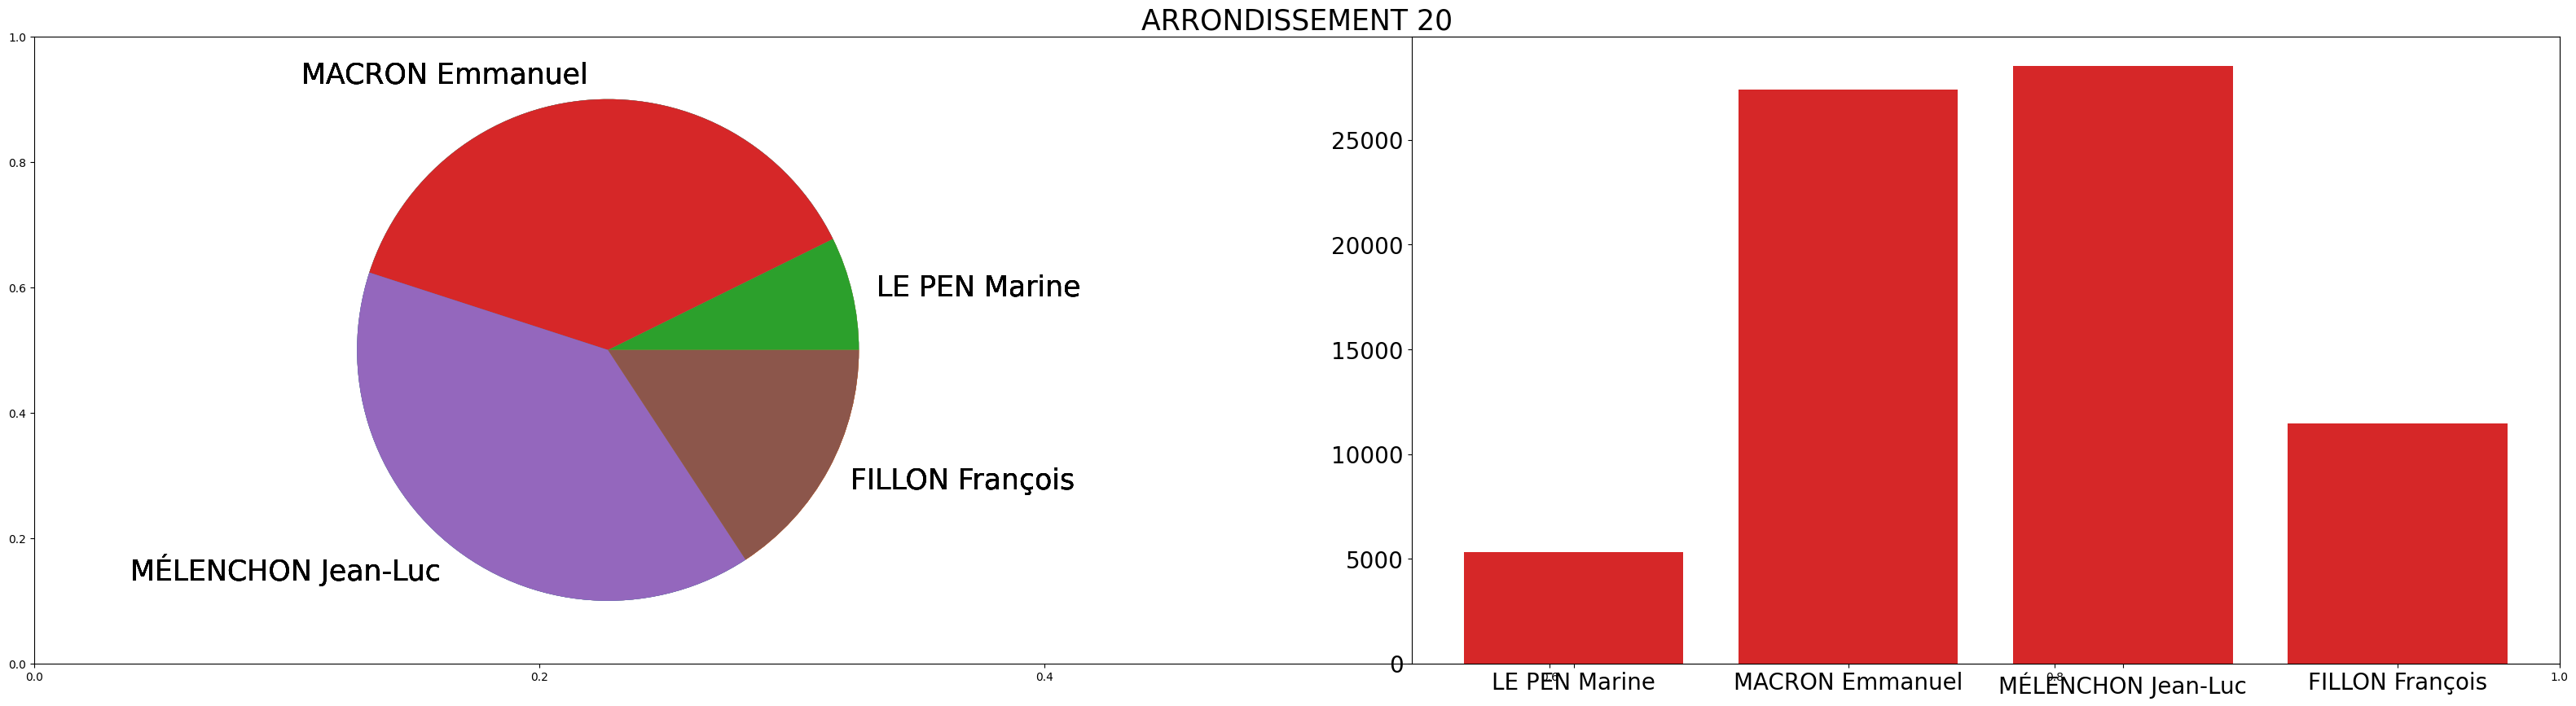

In [14]:
# Liste avec les noms des candidats à utiliser
candidats = ['LE PEN Marine', 'MACRON Emmanuel','MÉLENCHON Jean-Luc', 'FILLON François']

for x in sum_par_arrond_filter[candidats].index:
    fig = matplotlib.pyplot.figure(figsize=(40,10)) # Créer la figure
    matplotlib.pyplot.title(f'ARRONDISSEMENT {x+1}', size=25) # Title
    ax1 = fig.add_subplot(121) # Graphique de gauche
    ax2 = fig.add_subplot(122) # Graphique de droit
    for c in candidats:
        ax1.pie(sum_par_arrond_filter[candidats].iloc[x], labels = candidats, textprops={'fontsize': 25})# Graphique circulaire du nombre de voix par arrondissement par candidat
        ax2.bar(candidats, sum_par_arrond_filter[candidats].iloc[x]) # Graphique des barres du nombre de voix par arrondissement par candidat
        ax2.tick_params(axis='x', labelsize=20)
        ax2.tick_params(axis='y', labelsize=20)